#**CHAPTER 5. CREDIT SPREADS**
---

##0.REFERENCE

https://chatgpt.com/share/69890f65-f5c0-8012-9882-0d860044a6ae

##1.CONTEXT

**Introduction**

Credit markets are built around a simple but easily misunderstood idea: spreads exist because investors require compensation for bearing risks that are not fully spanned by the risk-free curve. In practice, that compensation is not paid smoothly. It is earned slowly in benign conditions and then “charged back” abruptly when funding and liquidity constraints bind. This asymmetry is the defining structural feature of credit, and it is precisely why a mechanism-first lens is essential. If you treat spreads as “just another signal” you will inevitably confuse the source of expected compensation (default and liquidity premia) with the dominant determinants of realized outcomes (regime shifts, correlation stress, execution costs, and constraints).

This notebook is a synthetic laboratory designed to make those relationships explicit and auditable. It does not forecast anything and does not attempt to engineer a profitable strategy. Instead, it constructs a controlled environment where the economics of credit can be inspected as a system: a regime process drives state variables that shape a tradable spread surface; a bounded agent selects from a finite action set; a portfolio and execution layer converts theoretical exposures into realized PnL after costs, impact, leverage caps, and drawdown stops. The goal is to make the causal chain visible: **state → surface → action → trade → costs/constraints → realized PnL**, and then to read diagnostics back into structural interpretation.

**Economic context: why credit spreads exist**

A credit spread is not a “mystery wedge.” It is a price for bearing downside risks that become salient precisely when balance sheets and market-making capacity are impaired. At a minimum, spreads embed compensation for expected credit losses (default intensity times loss-given-default) and for uncertainty around those losses. But in modern markets, particularly for tradable indices, spreads also reflect liquidity conditions: the ability to finance, warehouse, and transfer credit risk. Liquidity here is not a vague narrative variable; it is an equilibrium object that moves discontinuously when dealers and leveraged investors face constraints. That is why, empirically, spreads can gap wider even when default fundamentals have not yet deteriorated proportionally. Credit often prices the downside before equities “admit it,” because spreads are the instrument through which funding and hedging stress first becomes monetized.

A mechanism-first notebook must therefore separate at least three forces: (i) a slow-moving component related to hazard or default intensity, (ii) a liquidity component that governs impact and the cost of changing exposures, and (iii) a correlation or common-factor stress component that collapses diversification and creates gap risk. These forces shape the surface and also shape execution. A key pedagogical point is that the same “stress” variable that widens spreads should also make trading more expensive. This coupling is not optional if the notebook is meant to teach structure rather than produce a cosmetically smooth backtest.

**Why this mechanism matters**

Credit is the canonical domain where **carry** and **fragility** are inseparable. In calm regimes, selling credit protection or running short-spread exposure can look like a stable income stream: small daily tightening, muted volatility, and apparently favorable Sharpe ratios. Yet the true economics is that carry is payment for bearing rare but severe drawdowns. The fragility is amplified by the market’s financing architecture: when spreads widen and volatility rises, margin requirements increase, liquidity evaporates, and investors are forced to de-risk into worse prices. That is the mechanism by which the “premium” is delivered: you are compensated for being the marginal liquidity provider when others cannot or will not provide it.

This is not merely a story about tail risk. It is a story about **execution dominance**. In stressed regimes, the act of changing your position can be as important as the position itself. A strategy that is theoretically correct—e.g., “buy protection when hazard rises”—may fail mechanically if you must pay large impact and cross the leverage cap, triggering forced de-risking. Conversely, a conservative action such as going flat can dominate because it preserves optionality under high impact. For professional intuition, the correct question is not “what is the direction?” but “what is the mechanism, and where does it break under constraints?”

**What this notebook demonstrates**

The notebook demonstrates a complete closed-loop system:

1) A **regime-switching** process generates macro states: “carry calm,” “late cycle,” and “liquidity stress.” Regimes are persistent and transition via an explicit Markov matrix, which makes regime dependence a structural assumption rather than an implicit narrative.

2) A set of **state variables** evolves under those regimes: a short risk-free anchor, a positive default hazard process, a liquidity stress process, and a correlation stress process. These states jointly determine the level and shape of the spread curve.

3) A **tradable surface** emerges: a spread curve by tenor for two rating buckets (IG and HY). The surface is not decorative; it is directly mapped into tradable proxies and derived features (levels and slopes) that drive PnL and policy decisions.

4) A **constrained action space** is defined: FLAT, LONG_SPREAD, SHORT_SPREAD, CURVE_STEEPENER. Actions are finite, enumerated constants, and each action maps to a portfolio target.

5) A **portfolio and execution environment** applies transaction costs, a liquidity- and correlation-dependent impact proxy, leverage and position limits, and a drawdown stop. This layer enforces the central lesson: realized outcomes are shaped by execution under stress.

6) Two policies are implemented: an auditable **baseline rule** and an optional **LLM policy** that is strictly limited to selecting from allowed actions and providing a short rationale. The LLM is not allowed to alter code, parameters, or actions. If it fails format validation, the system falls back to the baseline automatically.

7) Diagnostics translate the run into interpretable objects: equity, regimes, costs, leverage, action counts, and an interpretive table that maps mechanisms to observed fragilities.

The emphasis throughout is that the surface is a state-dependent object, and that the agent interacts with the surface through limited expressions. You are not “predicting spreads.” You are interacting with a credit surface that is the projection of deeper balance-sheet constraints and default/liquidity premia.

**Agentic structure: bounded decisions, auditable flow**

Agentic structure is valuable here only if bounded. The agent in this notebook is execution-limited by design. It does not tune hyperparameters, it does not invent new trades, and it does not access the simulator internals. It sees a compact state summary (regime label and a few numbers), a compact surface summary (levels and slopes), and the current portfolio state. Its output is machine-parseable JSON specifying one action and a short rationale. This is not a stylistic preference; it is an auditability requirement. In professional settings, decision logic must be reconstructible from logs. A bounded action space also forces the analyst to think in market primitives: “am I running short spread carry,” “am I buying protection,” “am I expressing curve repricing,” or “am I flat.”

The agentic loop is thus structurally clean: at each time step, the environment generates state and surface; the policy selects an action; the execution layer translates action into trades and costs; the portfolio updates; the system logs everything. This matches how real portfolios are managed: decisions are discrete, constraints are binding, and the largest errors come from regime shifts and liquidity assumptions rather than from small forecasting mistakes.

**How curves and surfaces arise**

Spread curves arise because compensation is term-dependent. Expected loss scales with horizon, but not linearly; liquidity premia can rise with maturity because warehousing risk becomes more expensive; correlation stress can be front-loaded because near-term hedging demand and forced selling concentrate in short horizons. In real markets, the curve also embeds technicals, issuance patterns, central bank policy transmission, and the shape of dealer inventories. This notebook simplifies those drivers into explicit functional forms: hazard contributes a term related to loss-given-default and maturity; liquidity contributes an increasing term with tenor; correlation stress contributes a front-loaded term; and stress regimes can add jump components. The objective is not realism in every micro-detail; it is interpretability in how shape emerges and how shape connects to tradable expressions like “level” and “slope.”

The surface is tradable in two complementary ways: as a level exposure (spread risk) and as a curve exposure (steepener via slope changes). This distinction is central. Many practitioners intuitively think in “tighten/widen,” but a large fraction of credit PnL comes from curve changes: repricing concentrated in the front-end, migration of risk premia across maturities, and non-parallel shifts in spread curves. This notebook makes those components explicit and gives the agent a specific curve expression rather than leaving it implicit.

**Execution realism: costs, impact, and constraints are part of the mechanism**

In mechanism-first laboratories, execution realism is not a garnish; it is the bridge between economic theory and realized outcomes. This notebook includes proportional costs and an impact proxy that scales with liquidity stress and correlation stress. The effect is immediate: in calm regimes, trading is cheap enough that low-frequency rebalancing is feasible; in stress regimes, costs accelerate and can dominate gross PnL. This creates the correct structural incentive: avoid churn, respect that “being right” about mechanism is insufficient if you cannot express it cheaply, and recognize that the highest expected-return trades are often unavailable at the moment they are most needed.

Leverage caps and position limits are likewise not arbitrary. Credit risk is typically warehoused using leverage, whether explicit or embedded in derivatives and financing. When spreads widen, margin and funding conditions tighten, forcing deleveraging. The notebook captures that professional reality via a maximum leverage constraint and a drawdown stop. The stop is not “risk management theater”; it is a demonstration that survival constraints dominate optimization once regimes shift. In real markets, investors frequently become forced sellers not because their thesis is wrong, but because their financing is wrong. A mechanism-first notebook must therefore model financing as a binding constraint, not as an afterthought.

**Mechanism-first thinking: what to look for as you read the outputs**

When you run the notebook, do not read the equity curve as a performance chart. Read it as an instrumentation output. Ask: In which regimes does carry accumulate, and what is the cost of carry? When stress arrives, does the surface gap? Does leverage approach the cap before drawdown stop? Does cumulative cost accelerate in stress, and does the policy reduce turnover accordingly? Does HY behave as a higher-beta version of IG, and does that create asymmetric fragility? Do curve trades actually diversify, or do they inherit the same liquidity/correlation stresses?

If the notebook is doing its job, you will observe a coherent story: calm regimes make short-spread postures look stable; late-cycle regimes push hazard and curve repricing; stress regimes cause spread gapping and a sharp rise in execution costs. The agentic structure then reveals what a bounded policy can and cannot do under such conditions. The point is not that one policy “wins,” but that the environment exposes the same practical truth repeatedly: surfaces exist because mechanisms exist, and those mechanisms pay in calm and charge in stress, with execution converting theory into realized fragility.

This is the intended professional lesson: treat credit as a coupled system of risk premia, liquidity, and constraints, not as a univariate signal to be forecasted.


##2.LIBRARIES AND ENVIRONMENT

In [11]:
# CELL 2 — installs/imports/seed/run_config/utilities/logging

import sys, os, json, time, math, hashlib, platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Run config (Chapter 5)
# ----------------------------
run_config = {
  "chapter_id": 5,
  "chapter_name": "Credit Spreads — Credit Risk Surface",
  "seed": 11,
  "T": 900,
  "dt": 1.0,

  "regimes": {
    "names": ["carry_calm", "late_cycle", "liquidity_stress"],
    "markov_P": [
      [0.965, 0.030, 0.005],
      [0.060, 0.920, 0.020],
      [0.090, 0.140, 0.770]
    ],
    "notes": "Regime drives default intensity drift, liquidity stress, and correlation stress."
  },

  "market_params": {
    "mechanism": "carry from spread roll-down + compensation for default/liquidity risk under regime-dependent hazard and liquidity withdrawal",
    "rf_level0": 0.03,
    "rf_mean_revert": 0.02,
    "rf_sigma": 0.006,

    "hazard0": 0.015,
    "hazard_kappa": 0.08,
    "hazard_sigma": 0.03,

    "liq0": 0.10,
    "liq_kappa": 0.10,
    "liq_sigma": 0.10,

    "corr_stress0": 0.15,
    "corr_kappa": 0.08,
    "corr_sigma": 0.10,

    "recovery_rate": 0.40,
    "jump_intensity_stress": 0.015,
    "jump_size_spread": 0.002
  },

  "surface_params": {
    "surface_type": "curve",
    "tenors_days": [30, 90, 180, 365, 730],
    "rating_buckets": ["IG", "HY"],
    "construction": "spread(tau, rating)= base + hazard*LGD*sqrt(tau) + liquidity_premium(tau) + corr_stress_premium(tau) + regime_jumps",
    "liq_term_shape": "increasing in tau, steeper in stress",
    "corr_term_shape": "mostly front-loaded; spikes in stress"
  },

  "execution_params": {
    "cost_fixed": 0.00,
    "cost_bps": 3.0,
    "slippage_lambda": 0.18,
    "impact_proxy": "abs(trade_notional) * slippage_lambda * (liq_t + corr_t)"
  },

  "risk_params": {
    "max_leverage": 2.0,
    "pos_limit": 1.0,
    "max_dd_stop": 0.22
  },

  "policy_params": {
    "enable_llm": True,
    "llm_model": "gpt-4o-mini",
    "llm_temperature": 0.0,
    "fallback_to_baseline_on_error": True,
    "llm_max_rationale_chars": 240
  }
}

np.random.seed(run_config["seed"])

# ----------------------------
# Utilities
# ----------------------------
def stable_hash(obj_str: str) -> str:
    """Stable hash for reproducibility/audit."""
    return hashlib.sha256(obj_str.encode("utf-8")).hexdigest()

def clip(x, lo, hi):
    return lo if x < lo else hi if x > hi else x

def softplus(x):
    # numerically stable-ish softplus
    if x > 30:
        return x
    return math.log1p(math.exp(x))

def safe_float(x, default=0.0):
    try:
        return float(x)
    except Exception:
        return default

def summarize_state_for_agent(t, regime_name, rf, hazard, liq, corr, surface_feats, portfolio, last_action, recent_costs):
    # Keep it compact and explicitly numeric; do not leak config/code.
    ctx = {
        "t": int(t),
        "regime": str(regime_name),
        "state_summary": {
            "rf": float(rf),
            "hazard": float(hazard),
            "liq": float(liq),
            "corr": float(corr),
            "credit_beta": float(0.6*liq + 0.4*corr)
        },
        "surface_summary": {
            "level_ig": float(surface_feats["level_ig"]),
            "slope_ig": float(surface_feats["slope_ig"]),
            "level_hy": float(surface_feats["level_hy"]),
            "slope_hy": float(surface_feats["slope_hy"])
        },
        "portfolio": {
            "pos_ig_level": float(portfolio["pos"]["ig_level"]),
            "pos_hy_level": float(portfolio["pos"]["hy_level"]),
            "pos_curve_tilt": float(portfolio["pos"]["curve_tilt"]),
            "leverage": float(portfolio["leverage"])
        },
        "recent_costs": float(recent_costs),
        "last_action": str(last_action)
    }
    return ctx

def validate_llm_json(obj, allowed_actions, max_chars):
    # Expected: {"action": "...", "rationale": "..."}
    if not isinstance(obj, dict):
        return (False, None, None, "not a dict")
    action = obj.get("action", None)
    rationale = obj.get("rationale", "")
    if action not in allowed_actions:
        return (False, None, None, "action not allowed")
    if not isinstance(rationale, str):
        return (False, None, None, "rationale not a string")
    if len(rationale) > int(max_chars):
        return (False, None, None, "rationale too long")
    if len(rationale.strip()) == 0:
        return (False, None, None, "empty rationale")
    return (True, action, rationale.strip(), "")

# ----------------------------
# Logging structures
# ----------------------------
step_log = []
metrics = {}
config_hash = stable_hash(json.dumps(run_config, sort_keys=True))
run_manifest = {
    "run_id": None,  # filled at end
    "timestamp_utc": None,
    "config_hash": config_hash,
    "policy_mode": None,
    "env_fingerprint": {
        "python": sys.version.split()[0],
        "platform": platform.platform(),
        "numpy": np.__version__,
        "pandas": pd.__version__
    },
    "verification_status": "Not verified"
}

print("Loaded run_config:")
print(json.dumps(run_config, indent=2))
print("\nconfig_hash:", config_hash)


Loaded run_config:
{
  "chapter_id": 5,
  "chapter_name": "Credit Spreads \u2014 Credit Risk Surface",
  "seed": 11,
  "T": 900,
  "dt": 1.0,
  "regimes": {
    "names": [
      "carry_calm",
      "late_cycle",
      "liquidity_stress"
    ],
    "markov_P": [
      [
        0.965,
        0.03,
        0.005
      ],
      [
        0.06,
        0.92,
        0.02
      ],
      [
        0.09,
        0.14,
        0.77
      ]
    ],
    "notes": "Regime drives default intensity drift, liquidity stress, and correlation stress."
  },
  "market_params": {
    "mechanism": "carry from spread roll-down + compensation for default/liquidity risk under regime-dependent hazard and liquidity withdrawal",
    "rf_level0": 0.03,
    "rf_mean_revert": 0.02,
    "rf_sigma": 0.006,
    "hazard0": 0.015,
    "hazard_kappa": 0.08,
    "hazard_sigma": 0.03,
    "liq0": 0.1,
    "liq_kappa": 0.1,
    "liq_sigma": 0.1,
    "corr_stress0": 0.15,
    "corr_kappa": 0.08,
    "corr_sigma": 0.1,
    "re

##3.REGIME PROCESS

###3.1.OVERVIEW

**Cell 3 — Regime Process and State Evolution**

This cell establishes the hidden engine of the entire laboratory: a regime process and a set of state variables that evolve under regime-dependent dynamics. Mechanism-first work begins here because surfaces and PnL are downstream objects; without an explicit driver of “why the world changes,” any subsequent curve behavior would be an ungrounded artifact. The notebook uses a Markov transition matrix to model regime persistence and switching among three economically interpretable states: a benign carry environment, a late-cycle deterioration phase, and a liquidity-stress environment. The value of a Markov specification in this context is not realism for its own sake; it is auditability. You can read the matrix, infer persistence, and know what kind of crisis frequency you have assumed.

The state variables are chosen to represent distinct economic channels that jointly shape credit spreads. A short risk-free anchor captures the idea that credit trades are often quoted relative to an evolving risk-free baseline. A default hazard process represents expected-loss pressure and is constructed to remain positive and mean-reverting, with regime-dependent drift and volatility. Liquidity stress and correlation stress are also positive, mean-reverting drivers. They are not merely “noise terms”; they encode funding and balance sheet constraints that determine how spreads widen and how expensive it becomes to change positions.

A critical modeling decision is that stress regimes change both the level and the variability of these states. Late-cycle conditions raise hazard drift and can increase curve repricing pressure. Liquidity stress increases liquidity and correlation stress aggressively, reflecting the empirical observation that dealer balance sheets and hedging demand become binding simultaneously. This creates the right structural coupling: the same time periods in which spreads widen are also the periods in which execution becomes more expensive and constraints are more likely to bind.

The jump mechanism introduced here is conceptually important even if it is implemented as a simple flag. Credit crises are not always continuous diffusions; they often include gap moves driven by forced selling, discontinuous repricing of tail risk, and market structure effects. The jump flag provides a controlled way to create such discontinuities in the spread surface downstream. Importantly, the jump intensity is regime-conditioned so that “gaps” are not random surprises but features of stress.

The learning objective of this cell is to force the reader to articulate causal links. When spreads later widen, you can trace widening back to one of four channels: hazard drift, liquidity stress, correlation stress, or stress-conditioned jumps. This is precisely how professionals reason about credit: not “what is the spread doing,” but “which mechanism is driving the repricing, and what does that imply about execution and constraints.”


###3.2.CODE AND IMPLEMENTATION

In [12]:
# CELL 3 — regime process + state evolution (explicit Markov + transitions)

T = run_config["T"]
reg_names = run_config["regimes"]["names"]
P = np.array(run_config["regimes"]["markov_P"], dtype=float)

mp = run_config["market_params"]
dt = float(run_config["dt"])

# Regime-dependent multipliers (explicit and interpretable)
REG = {
    "carry_calm":       {"haz_drift": -0.15, "haz_sig": 0.7,  "liq_drift": -0.20, "liq_sig": 0.7,  "corr_drift": -0.10, "corr_sig": 0.7,  "rf_drift": 0.00},
    "late_cycle":       {"haz_drift": +0.35, "haz_sig": 1.0,  "liq_drift": +0.10, "liq_sig": 1.0,  "corr_drift": +0.10, "corr_sig": 1.0,  "rf_drift": +0.15},
    "liquidity_stress": {"haz_drift": +0.90, "haz_sig": 1.6,  "liq_drift": +1.20, "liq_sig": 1.8,  "corr_drift": +1.00, "corr_sig": 1.7,  "rf_drift": -0.25},
}

# Storage
r_idx = np.zeros(T, dtype=int)
rf = np.zeros(T, dtype=float)
haz = np.zeros(T, dtype=float)
liq = np.zeros(T, dtype=float)
corr = np.zeros(T, dtype=float)
jump_flag = np.zeros(T, dtype=int)

# Initialize
r_idx[0] = 0
rf[0] = mp["rf_level0"]
haz[0] = mp["hazard0"]
liq[0] = mp["liq0"]
corr[0] = mp["corr_stress0"]

def sample_next_regime(cur_idx):
    probs = P[cur_idx]
    return int(np.random.choice(len(probs), p=probs))

def ou_step(x, kappa, mean, sigma, drift_shift=0.0):
    # OU step: dx = kappa*(mean - x)*dt + drift_shift*dt + sigma*sqrt(dt)*eps
    eps = np.random.randn()
    return x + kappa*(mean - x)*dt + drift_shift*dt + sigma*math.sqrt(dt)*eps

def pos_mr_step(x, kappa, x0, sigma, drift_shift=0.0):
    # Mean-reverting latent process on log-scale -> positive via softplus
    # We evolve z, then map to positive. This keeps interpretation but avoids negativity.
    # Use x itself as positive; convert to z = log(x + small).
    small = 1e-6
    z = math.log(max(x, small))
    z_next = z + kappa*(math.log(max(x0, small)) - z)*dt + drift_shift*dt + sigma*math.sqrt(dt)*np.random.randn()
    x_raw = math.exp(z_next)
    return x_raw

for t in range(T-1):
    cur_reg = reg_names[r_idx[t]]
    m = REG[cur_reg]

    # Regime transition
    r_idx[t+1] = sample_next_regime(r_idx[t])
    next_reg = reg_names[r_idx[t+1]]
    m_next = REG[next_reg]

    # Risk-free short rate (OU)
    rf[t+1] = ou_step(
        rf[t],
        kappa=mp["rf_mean_revert"],
        mean=mp["rf_level0"],
        sigma=mp["rf_sigma"] * m_next["haz_sig"],  # mild coupling: late/stress slightly noisier rates
        drift_shift=0.002 * m_next["rf_drift"]
    )

    # Default hazard (positive mean-reverting)
    haz[t+1] = pos_mr_step(
        haz[t],
        kappa=mp["hazard_kappa"],
        x0=mp["hazard0"],
        sigma=mp["hazard_sigma"] * m_next["haz_sig"],
        drift_shift=0.02 * m_next["haz_drift"]
    )
    haz[t+1] = max(haz[t+1], 1e-4)

    # Liquidity stress (positive mean-reverting)
    liq[t+1] = pos_mr_step(
        liq[t],
        kappa=mp["liq_kappa"],
        x0=mp["liq0"],
        sigma=mp["liq_sigma"] * m_next["liq_sig"],
        drift_shift=0.06 * m_next["liq_drift"]
    )
    liq[t+1] = max(liq[t+1], 1e-4)

    # Correlation stress (positive mean-reverting)
    corr[t+1] = pos_mr_step(
        corr[t],
        kappa=mp["corr_kappa"],
        x0=mp["corr_stress0"],
        sigma=mp["corr_sigma"] * m_next["corr_sig"],
        drift_shift=0.05 * m_next["corr_drift"]
    )
    corr[t+1] = max(corr[t+1], 1e-4)

    # Stress jump mechanism (binary flag that will feed into spreads)
    if next_reg == "liquidity_stress":
        if np.random.rand() < mp["jump_intensity_stress"]:
            jump_flag[t+1] = 1

# Sanity summary by regime (rough means)
df_state = pd.DataFrame({
    "regime": [reg_names[i] for i in r_idx],
    "rf": rf,
    "hazard": haz,
    "liq": liq,
    "corr": corr,
    "jump": jump_flag
})
summary = df_state.groupby("regime")[["hazard","liq","corr","jump"]].mean().reset_index()
print("State sanity summary (means by regime):")
print(summary.to_string(index=False))


State sanity summary (means by regime):
          regime   hazard      liq     corr     jump
      carry_calm 0.014782 0.091659 0.151694 0.000000
      late_cycle 0.015683 0.100625 0.162685 0.000000
liquidity_stress 0.014741 0.104749 0.214219 0.017857


##4.MARKET SIMULATOR

###4.1.OVERVIEW

**Cell 4 — Market Simulator and Tradable Spread Surface Construction**

This cell turns the latent economic state into an observable, tradable object: a credit spread curve surface by tenor and rating bucket. In a mechanism-first laboratory, the surface is the central pedagogical artifact. It is where different economic forces—expected loss, liquidity premia, correlation stress, and jump risk—become visible and measurable. The key is that the surface is not merely plotted; it is used to generate tradable proxies and features that feed directly into portfolio PnL and policy decisions.

The notebook constructs spread curves for two rating buckets, IG and HY, to demonstrate segmentation and differential sensitivity. The formula is intentionally explicit: a base spread, a hazard-driven term tied to loss-given-default, a liquidity term with a tenor-dependent shape, a correlation-stress term that is front-loaded, and a stress-conditioned jump component. Each term has an economic interpretation. Hazard times LGD captures expected-loss pricing pressure and its horizon effect. Liquidity premia increasing with tenor reflect inventory and funding horizons: warehousing long-dated credit risk is more expensive when balance sheets are scarce. Correlation stress being front-loaded reflects near-term hedging pressure and the collapse of diversification when common factors dominate.

This cell also defines derived surface summaries: level and slope for each rating bucket. Those summaries are intentionally minimal yet sufficient. They reduce the high-dimensional surface to interpretable dimensions that can be traded and can be used by a bounded policy. The “level” is a proxy for overall spread compensation and risk sentiment. The “slope” is a proxy for term repricing and the distribution of risk across horizons. Importantly, the notebook uses a blended stress index (credit_beta) derived from liquidity and correlation stress to provide a compact, economically meaningful “state of the market” signal.

To connect the surface to PnL, the notebook introduces synthetic index price proxies driven by spread changes through an effective duration mapping. This is not a full bond pricing model, and it does not need to be. The mechanism being taught is that spread widening corresponds to price declines with magnitude proportional to duration, and that duration-like sensitivity can itself vary with stress. By making this mapping explicit, the notebook ensures that “long spread” and “short spread” positions have an interpretable payoff structure: they profit or lose as spreads widen or tighten, and they exhibit asymmetry in stress because spreads can gap.

The learning objective of this cell is to teach how a surface is an equilibrium object: it is the projection of state variables into tradable prices. Students should leave with the ability to read a spread curve as a decomposition of mechanisms, not as a line chart. If hazard rises, which part of the curve should move and why? If liquidity stress rises, why does the slope steepen and why does execution cost rise simultaneously? This is the surface interpretation skill the laboratory is designed to build.


###4.2.CODE AND IMPLEMENTATION

In [14]:
# CELL 4 — market simulator: risk-free curve + tradable spread curves + index price proxies

tenors_days = run_config["surface_params"]["tenors_days"]
tenors_years = np.array(tenors_days, dtype=float) / 365.0

LGD = 1.0 - float(mp["recovery_rate"])

# Rating bucket base levels + sensitivities (explicit, interpretable)
RATING = {
    "IG": {"base": 0.008, "haz_mult": 0.7, "liq_mult": 0.9, "corr_mult": 0.8, "dur": 4.0},
    "HY": {"base": 0.030, "haz_mult": 1.7, "liq_mult": 1.3, "corr_mult": 1.1, "dur": 3.0},
}

def g_liq(tau):
    # liquidity premium increases with maturity (funding horizon + inventory risk)
    return np.sqrt(tau)  # simple, monotone, interpretable

def g_corr(tau):
    # correlation stress: mostly front-loaded (near-term repricing/hedging pressure)
    return 1.0 / (0.25 + tau)  # decreasing in tau

def rf_zero_yield_curve(rf_t):
    # A minimal, explicit curve: y(tau) = rf_t + a*log(1+tau) + b*(1-exp(-tau))
    a = 0.006
    b = 0.004
    y = rf_t + a*np.log1p(tenors_years) + b*(1.0 - np.exp(-2.0*tenors_years))
    return y

# Storage: spreads by time and tenor
spreads_IG = np.zeros((T, len(tenors_years)), dtype=float)
spreads_HY = np.zeros((T, len(tenors_years)), dtype=float)

# Derived features
level_ig = np.zeros(T)
slope_ig = np.zeros(T)
level_hy = np.zeros(T)
slope_hy = np.zeros(T)
credit_beta = 0.6*liq + 0.4*corr

# Index price proxy (synthetic)
index_price_IG = np.zeros(T)
index_price_HY = np.zeros(T)
index_price_IG[0] = 100.0
index_price_HY[0] = 100.0

# Jump driver to inject spread gapping (simple: add a bump to all tenors)
jump_bump = mp["jump_size_spread"]

for t in range(T):
    rf_curve = rf_zero_yield_curve(rf[t])

    # regime jump component (applies as additive bump to spread curve, stronger in HY)
    j = jump_bump if jump_flag[t] == 1 else 0.0

    # Build spreads for each rating
    for bucket, cfg in RATING.items():
        base = cfg["base"]
        s = (
            base
            + cfg["haz_mult"] * LGD * haz[t] * np.sqrt(tenors_years)
            + cfg["liq_mult"] * liq[t] * g_liq(tenors_years) * 0.06
            + cfg["corr_mult"] * corr[t] * g_corr(tenors_years) * 0.025
        )
        # Add jump: larger effect in HY, plus modest curve shape distortion
        if bucket == "IG":
            s = s + j * (0.8 + 0.2*np.sqrt(tenors_years))
        else:
            s = s + j * (1.5 + 0.3*np.sqrt(tenors_years))

        # Keep spreads positive and bounded
        s = np.clip(s, 0.0005, 0.50)

        if bucket == "IG":
            spreads_IG[t, :] = s
        else:
            spreads_HY[t, :] = s

    # Features
    level_ig[t] = float(spreads_IG[t].mean())
    slope_ig[t] = float(spreads_IG[t, -1] - spreads_IG[t, 0])
    level_hy[t] = float(spreads_HY[t].mean())
    slope_hy[t] = float(spreads_HY[t, -1] - spreads_HY[t, 0])

# Build index price proxies via spread changes on reference tenor (5Y-ish => use 730d here as long tenor proxy)
k_ref = len(tenors_years) - 1  # 730d
for t in range(T-1):
    dS_ig = spreads_IG[t+1, k_ref] - spreads_IG[t, k_ref]
    dS_hy = spreads_HY[t+1, k_ref] - spreads_HY[t, k_ref]

    # Duration proxy with mild stress dependence (duration effectively "extends" in stress due to liquidity/convexity)
    dur_ig = RATING["IG"]["dur"] * (1.0 + 0.10*credit_beta[t])
    dur_hy = RATING["HY"]["dur"] * (1.0 + 0.08*credit_beta[t])

    # dP ≈ -Dur * dSpread  (spread widening => price down)
    index_price_IG[t+1] = index_price_IG[t] + (-dur_ig * dS_ig) * 100.0
    index_price_HY[t+1] = index_price_HY[t] + (-dur_hy * dS_hy) * 100.0

# Package surface features per t for convenience
surface_feats = []
for t in range(T):
    surface_feats.append({
        "level_ig": level_ig[t],
        "slope_ig": slope_ig[t],
        "level_hy": level_hy[t],
        "slope_hy": slope_hy[t],
        "credit_beta": float(credit_beta[t])
    })

print("Market simulator built:")
print("Spreads (IG) sample t=0:", spreads_IG[0])
print("Spreads (HY) sample t=0:", spreads_HY[0])
print("Index prices last:", float(index_price_IG[-1]), float(index_price_HY[-1]))


Market simulator built:
Spreads (IG) sample t=0: [0.02038521 0.01985117 0.02025315 0.0221     0.02587963]
Spreads (HY) sample t=0: [0.04904009 0.04977751 0.05177259 0.0564     0.06450167]
Index prices last: 98.7188815611382 98.46945974763626


##5.PORTFOLIO ENVIRONMENT

###5.1.OVERVIEW

**Cell 5 — Execution and Portfolio Environment: Constraints as the Mechanism’s Delivery System**

This cell is where the notebook stops being a “curve generator” and becomes a financial system. The portfolio and execution environment translates abstract exposures into realized outcomes under frictions and constraints. In mechanism-first terms, this is where compensation becomes monetizable—or not—because this is where costs, leverage, and drawdown rules impose the institutional reality of trading credit risk. Without this layer, the experiment would teach the wrong lesson: that economics flows cleanly from surface to profit. In practice, the largest errors in credit arise from friction, financing, and forced behavior.

The portfolio is represented in a deliberately parsimonious way: level exposures to IG and HY spread risk, and a curve-tilt exposure that represents a steepener. This design emphasizes that many real-world credit portfolios are dominated by a small number of systematic exposures, even when implemented through numerous instruments. Each exposure has a clear payoff logic. Level exposure profits or loses through the synthetic index price proxy, which moves with spreads via an effective duration mapping. The curve tilt profits or loses through changes in the spread slope, representing non-parallel repricing across maturities.

Execution modeling is state-dependent. Transaction costs include a proportional component and an impact proxy that scales with liquidity stress and correlation stress. This is not an aesthetic choice. It encodes the structural fact that trading is easiest when markets are calm and hardest when markets are stressed. By tying impact to stress, the notebook creates the correct interaction between market mechanism and trading mechanism: the same conditions that create large repricing opportunities also create large implementation shortfalls.

Constraints are explicit and binding. Position limits keep exposures within a fixed range so that results remain comparable across runs and policies. A leverage cap imposes a portfolio-level constraint that mimics financing limits: as exposures rise, the system either scales positions or disallows further risk. A drawdown stop adds a survival constraint that can force the portfolio flat once a threshold is breached. This stop is pedagogically important because it demonstrates a hierarchy of objectives: once survival is threatened, optimization is overridden. In credit, this is the institutional reality of margin calls, risk committees, and mandated deleveraging.

The learning objective of this cell is to make constraints part of the economic story. If a short-spread posture earns carry in calm regimes, the question is whether it can survive the stress regime given leverage and drawdown limits. If the policy wants to rotate into long spread during stress, can it do so without paying prohibitive impact? These are professional questions. The environment forces them to be answered mechanically rather than rhetorically.


###5.2.CODE AND IMPLEMENTATION

In [15]:
# CELL 5 — execution + portfolio environment (positions, leverage, costs, pnl, constraints)

ep = run_config["execution_params"]
rp = run_config["risk_params"]

def compute_leverage(pos):
    return abs(pos["ig_level"]) + abs(pos["hy_level"]) + abs(pos["curve_tilt"])

def apply_position_limits(pos):
    lim = float(rp["pos_limit"])
    pos["ig_level"] = clip(pos["ig_level"], -lim, lim)
    pos["hy_level"] = clip(pos["hy_level"], -lim, lim)
    pos["curve_tilt"] = clip(pos["curve_tilt"], -lim, lim)
    return pos

def scale_to_leverage_cap(pos):
    lev = compute_leverage(pos)
    cap = float(rp["max_leverage"])
    if lev <= cap or lev <= 1e-12:
        return pos
    s = cap / lev
    pos = {k: pos[k]*s for k in pos}
    return pos

def trade_cost(trade, liq_t, corr_t):
    # Proportional + impact proxy. Units are "equity points" (synthetic).
    cost_bps = float(ep["cost_bps"])
    sl = float(ep["slippage_lambda"])
    fixed = float(ep["cost_fixed"])

    # Notional proxy: sum abs of trade legs
    notional = abs(trade["ig_level"]) + abs(trade["hy_level"]) + abs(trade["curve_tilt"])

    # proportional cost: bps of notional (scaled)
    prop = (cost_bps / 1e4) * notional * 100.0  # scale to be visible

    # impact proxy: |trade| * lambda * (liq + corr)
    impact = notional * sl * (liq_t + corr_t) * 10.0

    total = fixed + prop + impact
    return total, prop, impact

def pnl_step(pos, t):
    # Level exposures earn/lose via index price moves
    dP_ig = index_price_IG[t+1] - index_price_IG[t]
    dP_hy = index_price_HY[t+1] - index_price_HY[t]

    pnl_ig = pos["ig_level"] * dP_ig
    pnl_hy = pos["hy_level"] * dP_hy

    # Curve tilt: based on slope change (mix IG/HY slopes to reflect cross-credit curve repricing)
    slope_mix_t = 0.6*slope_ig[t] + 0.4*slope_hy[t]
    slope_mix_tp1 = 0.6*slope_ig[t+1] + 0.4*slope_hy[t+1]
    dSlope = slope_mix_tp1 - slope_mix_t

    pnl_tilt = pos["curve_tilt"] * (dSlope * 5000.0)  # scale factor (explicit)

    return pnl_ig + pnl_hy + pnl_tilt

# Portfolio state
portfolio = {
    "pos": {"ig_level": 0.0, "hy_level": 0.0, "curve_tilt": 0.0},
    "equity": 1000.0,
    "equity_peak": 1000.0,
    "costs_cum": 0.0,
    "leverage": 0.0,
    "dd": 0.0,
    "forced_flat": False
}

# Time series trackers (filled in backtest)
equity_series = np.full(T, np.nan)
costs_series = np.full(T, np.nan)
lev_series = np.full(T, np.nan)
dd_series = np.full(T, np.nan)

equity_series[0] = portfolio["equity"]
costs_series[0] = portfolio["costs_cum"]
lev_series[0] = compute_leverage(portfolio["pos"])
dd_series[0] = 0.0

print("Portfolio environment initialized.")


Portfolio environment initialized.


##6.ACTION SPACE

###6.1.OVERVIEW

**Cell 6 — Constrained Action Space and Action-to-Trade Mapping**

This cell formalizes the agent’s permissible degrees of freedom. It defines the finite action space and maps each action into a target portfolio. This step is essential for agentic safety and interpretability. In a mechanism-first laboratory, the agent is not a free-form optimizer. It is an execution-limited decision rule that must choose among a small set of economically meaningful expressions. That design ensures that observed behavior can be explained in market language rather than in opaque parameter space.

The action set in Chapter 5 is intentionally compact: FLAT, LONG_SPREAD, SHORT_SPREAD, and CURVE_STEEPENER. Each corresponds to a recognizable professional posture. FLAT is a risk-off stance that preserves optionality when execution costs are high or constraints are binding. LONG_SPREAD corresponds to being long protection or long spread risk: it benefits when spreads widen, which is typically associated with stress. SHORT_SPREAD corresponds to selling protection or harvesting carry: it benefits when spreads tighten or remain stable, but it is structurally exposed to sudden widening. CURVE_STEEPENER expresses a term structure view: that repricing will concentrate in a specific part of the curve, producing slope changes rather than purely parallel shifts.

Crucially, the mapping from action to portfolio target is deterministic and bounded. It is not left to an agent to decide sizing freely. This reflects a core governance principle: if the goal is to study mechanism, the experiment should not confound mechanism with uncontrolled position scaling. The notebook uses a stress-dependent risk budget to shrink exposure when liquidity and correlation stress are high. This introduces an execution-aware sizing discipline without granting the agent parameter control. It also demonstrates a realistic behavior: in stressed conditions, even if the economic thesis is strong, prudent sizing should decline because implementation costs and tail risks rise.

The action-to-trade mapping is also where turnover is defined. Trades are computed as the difference between current and target positions. This enables explicit measurement of turnover, costs, and the relationship between action switching and execution drag. A bounded action space thus becomes a measurable object: you can count how often the policy switches, how large trades are, and how those trades correlate with cost spikes and drawdowns.

The learning objective of this cell is to teach that “having a view” is not the same as “having a trade.” A view must be expressed through a constrained instrument set under risk budgeting and limits. The action space is the interface between economic interpretation and implementable portfolio behavior. By making that interface explicit, the notebook makes agentic decisions auditable and comparable across baseline and LLM policies.


###6.2.CODE AND IMPLEMENTATION

In [16]:
# CELL 6 — action space + action→trade mapping (the only allowed actions)

ALLOWED_ACTIONS = ["FLAT", "LONG_SPREAD", "SHORT_SPREAD", "CURVE_STEEPENER"]

def risk_budget_from_stress(liq_t, corr_t):
    # Shrink risk budget as liquidity/correlation stress rises (execution dominance).
    k = 1.2  # fixed, not agent-controlled
    return 1.0 / (1.0 + k*(liq_t + corr_t))

def action_to_target(action, t):
    # Deterministic sizing bounded by pos_limit and leverage cap.
    liq_t = float(liq[t])
    corr_t = float(corr[t])
    rb = risk_budget_from_stress(liq_t, corr_t)

    # Base magnitudes (synthetic "risk units")
    base_level = 0.90 * rb
    base_tilt = 0.80 * rb

    # Mild tilt: HY is more jumpy; keep it smaller than IG in some actions to show risk management structure.
    if action == "FLAT":
        target = {"ig_level": 0.0, "hy_level": 0.0, "curve_tilt": 0.0}

    elif action == "LONG_SPREAD":
        # Long spread risk: benefits on widening (stress), loses on tightening (calm carry)
        target = {"ig_level": +0.75*base_level, "hy_level": +0.55*base_level, "curve_tilt": -0.15*base_tilt}

    elif action == "SHORT_SPREAD":
        # Short spreads: earns in calm (tightening), bleeds convexly in stress widening
        target = {"ig_level": -0.75*base_level, "hy_level": -0.45*base_level, "curve_tilt": +0.05*base_tilt}

    elif action == "CURVE_STEEPENER":
        # Curve exposure: long long-end spread risk, short front-end spread risk (via slope proxy)
        # Keep level exposures near-neutral.
        target = {"ig_level": -0.10*base_level, "hy_level": +0.05*base_level, "curve_tilt": +0.85*base_tilt}

    else:
        # Safety fallback
        target = {"ig_level": 0.0, "hy_level": 0.0, "curve_tilt": 0.0}

    target = apply_position_limits(target)
    target = scale_to_leverage_cap(target)
    return target

def compute_trade(current_pos, target_pos):
    return {
        "ig_level": target_pos["ig_level"] - current_pos["ig_level"],
        "hy_level": target_pos["hy_level"] - current_pos["hy_level"],
        "curve_tilt": target_pos["curve_tilt"] - current_pos["curve_tilt"]
    }

print("Allowed actions:", ALLOWED_ACTIONS)
print("Example target (SHORT_SPREAD, t=0):", action_to_target("SHORT_SPREAD", 0))


Allowed actions: ['FLAT', 'LONG_SPREAD', 'SHORT_SPREAD', 'CURVE_STEEPENER']
Example target (SHORT_SPREAD, t=0): {'ig_level': -0.5192307692307692, 'hy_level': -0.31153846153846154, 'curve_tilt': 0.03076923076923077}


##7.BASE LINE

###7.1.OVERVIEW

**Cell 7 — Baseline Rule Policy (Deterministic, Auditable Decision Layer)**

Cell 7 defines the baseline policy, and in a mechanism-first laboratory this cell is not a “simple benchmark” in the dismissive sense. It is a control condition: a deterministic mapping from a compact description of market structure to an allowed action. Its role is to provide a stable reference point so that when outcomes differ across configurations (or when an optional LLM is enabled), we can attribute differences to the policy layer rather than to hidden changes in the environment. In other words, the baseline policy is not there to win; it is there to make causality legible.

The policy’s inputs are deliberately limited to state and surface summaries that correspond to economically meaningful drivers. It typically consumes regime identity (carry calm, late cycle, liquidity stress) and a small set of scalars such as hazard intensity, liquidity stress, correlation stress, and key surface features (spread level and slope for IG and HY). This set is intentionally small because the policy is meant to resemble a professional “risk posture” rule: it decides whether the system should be positioned to harvest carry, hedge the downside, express curve repricing, or preserve optionality by going flat. By restricting inputs, the notebook prevents the policy from becoming a hidden forecaster and ensures it remains an interpretable function of the mechanism.

Economically, the baseline expresses three canonical credit postures. In calm regimes with low stress index and relatively stable spread levels, the rule will tend to choose **SHORT_SPREAD**, representing the carry trade: being short protection, effectively selling insurance and collecting premium. In late cycle, where hazard drift rises and the curve can steepen as investors demand more compensation for longer-dated exposure, the rule can shift toward **CURVE_STEEPENER** to express term-structure repricing rather than a purely directional bet. In liquidity stress, where liquidity withdrawal and correlation stress dominate, the baseline typically prefers **LONG_SPREAD** or **FLAT**, reflecting two professional instincts: first, that spreads widen when stress dominates; and second, that execution costs and constraint risk can make “doing less” the optimal survival response even if the mechanism suggests widening.

A subtle but important structural role of this cell is that it embeds the idea that **curve shape and liquidity conditions matter more than direction**. Credit is not just “tighten/widen.” A rule that reacts only to level can fail when repricing is concentrated in a specific tenor region. Similarly, a rule that reacts strongly in stress but ignores execution will churn precisely when trading is most expensive, turning a correct economic view into a net-loss implementation. That is why baseline policies in this series should either include explicit hysteresis (to avoid over-trading) or at least include a penalty-like logic that reduces switching when stress is high.

The learning objective for this cell is to show that an agent can be constrained, interpretable, and still economically grounded. Students should be able to read the baseline rule as a small piece of institutional decision-making: a regime-conditioned risk posture that translates “what the market is paying for” into “what exposures are acceptable under the current execution regime.” The baseline policy is the first place where the notebook makes a disciplined statement about professional intuition, and it sets the standard for how any more complex policy must be evaluated: not by cleverness, but by whether it respects mechanism, execution, and constraints.


###7.2.CODE AND IMPLEMENTATION

In [17]:
# CELL 7 — baseline rule policy (deterministic, auditable, with hysteresis)

# Precompute trailing means to provide a stable baseline signal
w = 60  # trailing window (fixed)
lvl_ig_ma = pd.Series(level_ig).rolling(w, min_periods=10).mean().fillna(method="bfill").values
lvl_hy_ma = pd.Series(level_hy).rolling(w, min_periods=10).mean().fillna(method="bfill").values
haz_ma = pd.Series(haz).rolling(w, min_periods=10).mean().fillna(method="bfill").values

def baseline_policy(t, last_action, portfolio_state):
    reg = reg_names[r_idx[t]]
    beta = float(credit_beta[t])

    # Signals (explicit, interpretable)
    spread_rich_ig = level_ig[t] - lvl_ig_ma[t]
    spread_rich_hy = level_hy[t] - lvl_hy_ma[t]
    haz_trend = haz[t] - haz_ma[t]

    # Churn control (hysteresis): switching requires stronger evidence than staying
    switch_margin = 0.015  # fixed; not agent-controlled

    # Risk controls
    if portfolio_state["forced_flat"]:
        return "FLAT", "Drawdown stop active: remain flat to preserve capital under execution-dominated conditions."

    # If stress regime or stress index high: prefer LONG_SPREAD or FLAT (depending on leverage)
    if reg == "liquidity_stress" or beta > 0.45:
        if portfolio_state["leverage"] > 0.80*rp["max_leverage"]:
            return "FLAT", "Stress is elevated and leverage is already meaningful; reduce exposure to avoid liquidity/impact dominated losses."
        return "LONG_SPREAD", "Liquidity/correlation stress is high; long spread exposure benefits from widening while controlling execution via stress-scaled sizing."

    # Late cycle: hazard rising suggests repricing risk; use curve steepener (term repricing) unless spreads already very rich
    if reg == "late_cycle":
        if haz_trend > 0.002 and (slope_ig[t] > np.median(slope_ig[max(0,t-w):t+1])):
            return "CURVE_STEEPENER", "Late-cycle hazard is rising and curve slope is elevated; position for long-end repricing while keeping level exposure near-neutral."
        # If spreads are rich versus trailing mean, harvest carry by shorting spreads, but only if stress index is low
        if (spread_rich_ig + spread_rich_hy) > (2.0*switch_margin) and beta < 0.25:
            return "SHORT_SPREAD", "Spreads are rich relative to recent history in a non-stress regime; harvest carry cautiously with execution-aware sizing."

    # Calm carry regime: short spreads when not stressed; otherwise stay flat
    if reg == "carry_calm":
        if beta < 0.22 and (spread_rich_ig + spread_rich_hy) > switch_margin:
            return "SHORT_SPREAD", "Calm regime with low stress and mildly rich spreads; short spread risk to collect carry, accepting embedded crash risk."
        if beta < 0.22 and last_action == "SHORT_SPREAD":
            return "SHORT_SPREAD", "Signals remain consistent with calm carry; maintain short spread exposure while monitoring liquidity/correlation stress."
        if beta >= 0.22:
            return "FLAT", "Stress has drifted up even in calm regime; avoid paying impact to chase small carry."

    # Default: inertia (keep last action) unless a clean switch signal exists
    if last_action in ALLOWED_ACTIONS:
        return last_action, "No dominant regime-consistent edge beyond current posture; maintain action to reduce churn and execution drag."
    return "FLAT", "Initialization: start flat until regime-consistent signals emerge."


/tmp/ipython-input-476512113.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lvl_ig_ma = pd.Series(level_ig).rolling(w, min_periods=10).mean().fillna(method="bfill").values
/tmp/ipython-input-476512113.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lvl_hy_ma = pd.Series(level_hy).rolling(w, min_periods=10).mean().fillna(method="bfill").values
/tmp/ipython-input-476512113.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  haz_ma = pd.Series(haz).rolling(w, min_periods=10).mean().fillna(method="bfill").values


##8.LLM WRAPPER

###8.1.OVERVIEW

**Cell 8 — Optional GPT-4o-mini Policy Wrapper (Actions-Only, JSON-Only, Fallback-Safe)**

Cell 8 introduces the optional LLM decision layer, but it does so in a way that preserves the notebook’s core discipline: boundedness, auditability, and mechanism-first reasoning. The LLM is not used as a forecaster, nor as an optimizer, nor as an architect of the environment. It is used as a constrained decision function whose only task is to select one action from a predefined finite set and provide a short rationale that references mechanism and execution constraints. This is a governance-first use of an LLM: the model is a policy plug-in, not a system controller.

The wrapper is structurally defined by three constraints. First, the model’s inputs are limited to a compact context: time index, regime label, a handful of state scalars (hazard, liquidity, correlation, stress index), a handful of surface scalars (IG/HY levels and slopes), and the portfolio summary (current position, leverage, recent costs, last action). This input design matters because it enforces an epistemic boundary: the LLM cannot “peek” into hidden simulator internals and cannot invent information that the environment does not expose. Second, the output format is strictly machine-parseable JSON with exactly two fields: the chosen action and a short rationale. Third, the wrapper validates the output and automatically falls back to the deterministic baseline if validation fails.

This cell is where the notebook makes a technical point about agentic safety: a model that can output arbitrary text is not, by default, a safe controller. To become safe enough for controlled experiments, its output must be forced into a structured schema and checked against an allow-list. The notebook’s “JSON-only” rule is not a mere convenience; it is a hardening mechanism. If the model deviates—by producing invalid JSON, selecting an action outside the allowed set, or generating a rationale that violates the short constraint—the wrapper interprets that as failure and reverts to the baseline. This creates a stable, reproducible behavioral envelope and prevents “creative” outputs from affecting trading behavior.

Economically, the LLM’s rationale is important because it provides a traceable narrative for why a particular action was chosen. However, the notebook treats the rationale as documentation rather than authority. In professional environments, explanations are helpful only insofar as they align with observable telemetry. A rationale that claims to be “execution aware” must be consistent with turnover, cost accumulation, leverage usage, and regime conditions. This notebook’s logging design makes that accountability possible. The LLM can claim anything in words; the telemetry will determine whether the words correspond to actions that reduce churn in high-impact regimes or whether the policy is simply oscillating.

Another core concept embedded in this cell is the separation between **decision frequency** and **market frequency**. In many mechanism labs, allowing a policy to change its mind every time step creates pathological turnover that has no realistic interpretation. This series therefore encourages wrappers that either throttle LLM calls (e.g., querying every k steps), reuse last actions, or otherwise impose inertia. That is not “making it easier for the agent.” It is expressing a financial truth: in credit, transaction costs and liquidity risk impose an implicit holding-period constraint, and frequent rebalancing is not free. A properly constructed LLM wrapper should respect that constraint not by tuning parameters but by respecting the fixed action space and by limiting the frequency of decision updates.

The learning objective for Cell 8 is to show how modern LLMs can be incorporated into a financial system without surrendering control. Students should understand that “agentic” does not mean “unbounded autonomy.” It means a policy chooses from a constrained action space under strict input and output contracts, with full audit logs, and with deterministic fallbacks that preserve reproducibility and safety.


###8.2.CODE AND IMPLEMENTATION

In [18]:
# CELL 8 — optional GPT-4o-mini policy wrapper (JSON-only, actions-only, strict validation, fallback)

pp = run_config["policy_params"]

# Optional install for OpenAI SDK (Colab-safe). If install fails, we will fall back.
llm_available = False
client = None

if pp["enable_llm"]:
    try:
        # In Colab, pip is allowed inside a cell.
        import importlib
        try:
            import openai  # noqa
        except Exception:
            !pip -q install openai
        from openai import OpenAI  # new SDK style
        # Colab secrets:
        try:
            from google.colab import userdata
            api_key = userdata.get("OPENAI_API_KEY")
        except Exception:
            api_key = os.environ.get("OPENAI_API_KEY", None)

        if api_key and isinstance(api_key, str) and len(api_key) > 10:
            client = OpenAI(api_key=api_key)
            llm_available = True
        else:
            llm_available = False
            print("LLM disabled: OPENAI_API_KEY not found in Colab secrets or environment.")
    except Exception as e:
        llm_available = False
        print("LLM disabled: OpenAI SDK unavailable. Error:", str(e))

DECISION_SYSTEM = (
    "You are an execution-limited trading agent inside a synthetic market laboratory. "
    "You must ONLY select an action from the allowed list. "
    "You must NEVER propose code changes, parameter changes, or new actions. "
    "You must output valid JSON only."
)

def build_decision_user_prompt(ctx, allowed_actions):
    # Hardened prompt: actions-only, JSON-only.
    return (
        "Allowed actions:\n"
        f"{allowed_actions}\n\n"
        "Decision context (compact):\n"
        f"- t: {ctx['t']}\n"
        f"- regime: {ctx['regime']}\n"
        f"- state_summary: {json.dumps(ctx['state_summary'])}\n"
        f"- surface_summary: {json.dumps(ctx['surface_summary'])}\n"
        f"- current_position: {json.dumps(ctx['portfolio'])}\n"
        f"- recent_costs: {ctx['recent_costs']}\n"
        f"- last_action: {ctx['last_action']}\n\n"
        "Task:\n"
        "Choose exactly ONE action from the allowed list that best fits the mechanism and execution constraints.\n"
        "Return JSON only:\n"
        '{"action":"...","rationale":"1–3 sentences, mechanism + execution aware."}'
    )

def llm_policy(t, last_action, portfolio_state, recent_costs):
    # If LLM not available, immediately fallback.
    ctx = summarize_state_for_agent(
        t=t,
        regime_name=reg_names[r_idx[t]],
        rf=rf[t],
        hazard=haz[t],
        liq=liq[t],
        corr=corr[t],
        surface_feats=surface_feats[t],
        portfolio=portfolio_state,
        last_action=last_action,
        recent_costs=recent_costs
    )

    if not (pp["enable_llm"] and llm_available and client is not None):
        a, r = baseline_policy(t, last_action, portfolio_state)
        return a, r, False, "llm_unavailable"

    try:
        user_prompt = build_decision_user_prompt(ctx, ALLOWED_ACTIONS)
        # Use Responses API compatible call style.
        resp = client.responses.create(
            model=pp["llm_model"],
            input=[
                {"role": "system", "content": DECISION_SYSTEM},
                {"role": "user", "content": user_prompt}
            ],
            temperature=float(pp["llm_temperature"])
        )
        text = resp.output_text

        # Must be JSON-only. Attempt strict parse.
        obj = json.loads(text)
        ok, action, rationale, err = validate_llm_json(obj, ALLOWED_ACTIONS, pp["llm_max_rationale_chars"])
        if not ok:
            a, r = baseline_policy(t, last_action, portfolio_state)
            return a, r, False, f"llm_invalid:{err}"

        return action, rationale, True, ""

    except Exception as e:
        a, r = baseline_policy(t, last_action, portfolio_state)
        return a, r, False, f"llm_error:{str(e)[:120]}"


##9.BACKTESTING

###9.1.0VERVIEW

**Cell 9 — Closed-Loop Backtest Runner with Telemetry (State → Action → Execution → PnL)**

Cell 9 is the operational core of the notebook. It is where the mechanism, the surface, the constraints, and the policy layer are fused into a time-evolving closed-loop environment. If earlier cells define the economic world and the permissible actions, this cell answers the only question that matters in a mechanism-first laboratory: when a bounded agent interacts with a tradable surface under execution frictions and constraints, what structure emerges in realized outcomes? The backtest here is not “performance evaluation.” It is a controlled experiment that produces measurements.

The structure of the loop is intentionally explicit. At each time step, the environment is already fully determined by the regime and state evolution: hazard, liquidity stress, correlation stress, and the derived surface summaries are known. The policy—baseline or optional LLM—receives only a compact context and returns one action. That action is mapped deterministically to a target portfolio. Then the execution layer computes the trade required to move from current to target positions and applies transaction costs and impact. Finally, the portfolio updates equity, tracks leverage and drawdown, and records everything to a log.

The most important design feature is that the loop is instrumented with telemetry that attributes outcomes to mechanisms. Telemetry is not a debugging add-on; it is how the notebook converts a simulation into a scientific object. Execution telemetry records turnover, proportional costs, impact costs, and trade counts. Risk telemetry records maximum leverage observed, maximum drawdown observed, and whether a forced-flat stop was triggered. Regime telemetry counts time spent in each regime and attributes net PnL and costs by regime. Action telemetry records how often each action was chosen, how often the policy switched actions, and how long it held positions.

This telemetry architecture is the mechanism-first analog of a clinical trial’s case report forms: it ensures that when something goes wrong—or appears to work—the analyst can locate the causal channel. If the equity curve deteriorates in stress, the telemetry can tell you whether the damage came primarily from adverse spread moves (mechanism) or from impact costs and forced deleveraging (execution and constraints). If two policies diverge, the telemetry can reveal whether one churns more, pays more impact, or breaches leverage constraints more often. This is the standard of evidence a PhD-level practitioner should demand from any simulated system.

Cell 9 also encodes the reality that credit trading is dominated by survival constraints. The drawdown stop is a stylized representation of margin and governance constraints. When it triggers, the loop forces the portfolio flat, illustrating the hierarchical nature of objectives: survival supersedes optimization. This transforms the backtest into a demonstration of institutional behavior rather than a purely financial optimization problem. In real credit crises, strategies do not “choose” to delever; they are forced. A mechanism-first laboratory must reproduce that structural feature or it will miseducate by implying that the agent always remains free to act.

The cell’s heartbeat/progress logic and optional time budgets are operational safeguards that preserve the pedagogical experience. In environments with optional API calls, a policy call can block, making it appear as if the simulation is “stuck.” By adding periodic progress prints and optionally limiting decision frequency, the notebook ensures that the backtest remains observable and reproducible. Importantly, these controls also map to an economic truth: policies should not trade at unrealistic frequencies in illiquid markets. Limiting decision frequency can be interpreted as a disciplined holding period consistent with execution dominance.

The learning objective of Cell 9 is to teach students to read a backtest as a causal experiment. They should be able to say: “In calm regimes, carry positions produce small gains with low costs; in stress regimes, spreads gap and impact costs rise; constraints bind and forced flat may trigger; policy differences primarily manifest through turnover and cost exposure rather than through superior ‘signal.’” That is mechanism-first backtesting: the emphasis is on structure, not on outcomes.


###9.2.CODE AND IMPLEMENTATION

In [21]:
# CELL 9 — backtest runner + telemetry + progress heartbeat + hard time budget
# Fixes "silent hang" perception and protects against blocked LLM calls.

def _env_fingerprint():
    return {
        "python": sys.version.split()[0],
        "platform": platform.platform(),
        "numpy": np.__version__,
        "pandas": pd.__version__
    }

def _config_hash():
    return stable_hash(json.dumps(run_config, sort_keys=True))

def _now_utc_iso():
    return time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())

def _telemetry_template(policy_mode):
    cfg_hash = _config_hash()
    ts = _now_utc_iso()
    run_id = stable_hash(cfg_hash + "|" + ts + "|" + policy_mode)

    tel = {
        "run_manifest": {
            "run_id": run_id,
            "timestamp_utc": ts,
            "chapter_id": run_config["chapter_id"],
            "chapter_name": run_config["chapter_name"],
            "policy_mode": policy_mode,
            "config_hash": cfg_hash,
            "env_fingerprint": _env_fingerprint(),
            "verification_status": "Not verified"
        },
        "policy_telemetry": {
            "llm_enabled": bool(run_config["policy_params"]["enable_llm"]),
            "llm_available": bool(llm_available),
            "llm_model": run_config["policy_params"]["llm_model"],
            "llm_temperature": run_config["policy_params"]["llm_temperature"],
            "fallback_on_error": bool(run_config["policy_params"]["fallback_to_baseline_on_error"]),
            "invalid_json_count": 0,
            "invalid_action_count": 0,
            "rationale_too_long_count": 0,
            "llm_error_count": 0,
            "fallback_count": 0,
            "used_llm_count": 0,
            "llm_calls": 0,
            "llm_skipped_calls": 0
        },
        "execution_telemetry": {
            "turnover_abs_sum": 0.0,
            "turnover_by_leg": {"ig_level": 0.0, "hy_level": 0.0, "curve_tilt": 0.0},
            "prop_cost_sum": 0.0,
            "impact_cost_sum": 0.0,
            "total_cost_sum": 0.0,
            "trade_count": 0,
            "no_trade_count": 0,
            "avg_trade_abs": 0.0,
            "max_trade_abs": 0.0
        },
        "risk_telemetry": {
            "max_leverage_observed": 0.0,
            "max_dd_observed": 0.0,
            "forced_flat_triggered": False,
            "forced_flat_t": None,
            "leverage_breach_attempts": 0,
            "pos_limit_clip_events": 0
        },
        "regime_telemetry": {
            "counts": {name: 0 for name in reg_names},
            "pnl_net_by_regime": {name: 0.0 for name in reg_names},
            "cost_by_regime": {name: 0.0 for name in reg_names},
            "impact_by_regime": {name: 0.0 for name in reg_names},
            "jump_count": 0
        },
        "action_telemetry": {
            "counts": {a: 0 for a in ALLOWED_ACTIONS},
            "switch_count": 0,
            "repeat_count": 0,
            "hold_streak_max": 0
        }
    }
    return tel

def _note_policy_fallback(tel, llm_err_string):
    tel["policy_telemetry"]["fallback_count"] += 1
    s = "" if llm_err_string is None else str(llm_err_string)
    if "llm_invalid" in s:
        if "not a dict" in s or "Expecting value" in s or "JSON" in s:
            tel["policy_telemetry"]["invalid_json_count"] += 1
        if "action not allowed" in s:
            tel["policy_telemetry"]["invalid_action_count"] += 1
        if "rationale too long" in s:
            tel["policy_telemetry"]["rationale_too_long_count"] += 1
    if "llm_error" in s:
        tel["policy_telemetry"]["llm_error_count"] += 1

def _apply_limits_with_diagnostics(pos, tel):
    lim = float(rp["pos_limit"])
    for k in ["ig_level", "hy_level", "curve_tilt"]:
        if pos[k] > lim or pos[k] < -lim:
            tel["risk_telemetry"]["pos_limit_clip_events"] += 1
    pos = apply_position_limits(pos)

    lev_pre = compute_leverage(pos)
    if lev_pre > float(rp["max_leverage"]) + 1e-12:
        tel["risk_telemetry"]["leverage_breach_attempts"] += 1
    pos = scale_to_leverage_cap(pos)
    return pos

def run_backtest(policy_mode="baseline",
                 heartbeat_every=100,
                 time_budget_seconds=30.0,
                 llm_call_every=5):
    """
    heartbeat_every: print progress every N steps
    time_budget_seconds: hard wall-clock budget per run (prevents perceived infinite loops)
    llm_call_every: in LLM mode, only query LLM every k steps, otherwise hold last_action/baseline
                   (prevents frequent network calls from freezing the notebook)
    """
    assert policy_mode in ["baseline", "llm"]

    global step_log
    step_log = []

    telemetry = _telemetry_template(policy_mode)

    port = {
        "pos": {"ig_level": 0.0, "hy_level": 0.0, "curve_tilt": 0.0},
        "equity": 1000.0,
        "equity_peak": 1000.0,
        "costs_cum": 0.0,
        "leverage": 0.0,
        "dd": 0.0,
        "forced_flat": False
    }

    eq = np.zeros(T); eq[0] = port["equity"]
    cc = np.zeros(T); cc[0] = port["costs_cum"]
    lv = np.zeros(T); lv[0] = compute_leverage(port["pos"])
    dd = np.zeros(T); dd[0] = 0.0

    last_action = "FLAT"
    recent_costs = 0.0
    hold_streak = 0

    t_start = time.time()
    print(f"[START] policy_mode={policy_mode}  T={T}  llm_available={llm_available}  time_budget={time_budget_seconds}s")

    for t in range(T-1):
        # Hard time budget to prevent any “infinite” perception
        if (time.time() - t_start) > float(time_budget_seconds):
            print(f"[STOP] time budget exceeded at t={t}. Forcing early termination (audit-preserving).")
            break

        reg = reg_names[r_idx[t]]
        telemetry["regime_telemetry"]["counts"][reg] += 1
        telemetry["regime_telemetry"]["jump_count"] += int(jump_flag[t])

        # Update leverage + DD
        port["leverage"] = compute_leverage(port["pos"])
        telemetry["risk_telemetry"]["max_leverage_observed"] = max(
            telemetry["risk_telemetry"]["max_leverage_observed"], float(port["leverage"])
        )

        port["equity_peak"] = max(port["equity_peak"], port["equity"])
        port["dd"] = 1.0 - (port["equity"] / max(port["equity_peak"], 1e-9))
        telemetry["risk_telemetry"]["max_dd_observed"] = max(
            telemetry["risk_telemetry"]["max_dd_observed"], float(port["dd"])
        )

        # Drawdown stop
        if port["dd"] > float(rp["max_dd_stop"]):
            if not port["forced_flat"]:
                telemetry["risk_telemetry"]["forced_flat_triggered"] = True
                telemetry["risk_telemetry"]["forced_flat_t"] = int(t)
            port["forced_flat"] = True

        # Choose action
        used_llm = False
        err = ""
        if port["forced_flat"]:
            action = "FLAT"
            rationale = "Max drawdown stop triggered: force flat to demonstrate survival constraints under stress."
        else:
            if policy_mode == "llm":
                # Reduce LLM calls: query only every llm_call_every steps.
                if (t % int(llm_call_every) == 0):
                    telemetry["policy_telemetry"]["llm_calls"] += 1
                    action, rationale, used_llm, err = llm_policy(t, last_action, port, recent_costs)
                    if used_llm:
                        telemetry["policy_telemetry"]["used_llm_count"] += 1
                    else:
                        _note_policy_fallback(telemetry, err)
                else:
                    telemetry["policy_telemetry"]["llm_skipped_calls"] += 1
                    # Hold last action to reduce churn and avoid paying execution to “over-react”
                    action = last_action
                    rationale = "Hold last action to reduce churn; execution drag dominates marginal signal at high frequency."
            else:
                action, rationale = baseline_policy(t, last_action, port)

        # Enforce action validity
        if action not in ALLOWED_ACTIONS:
            action = "FLAT"
            rationale = "Safety fallback: invalid action resolved to FLAT."
            used_llm = False
            err = "invalid_action_fallback"
            telemetry["policy_telemetry"]["fallback_count"] += 1
            telemetry["policy_telemetry"]["invalid_action_count"] += 1

        # Action telemetry
        telemetry["action_telemetry"]["counts"][action] += 1
        if action == last_action:
            telemetry["action_telemetry"]["repeat_count"] += 1
            hold_streak += 1
        else:
            telemetry["action_telemetry"]["switch_count"] += 1
            telemetry["action_telemetry"]["hold_streak_max"] = max(
                telemetry["action_telemetry"]["hold_streak_max"], int(hold_streak)
            )
            hold_streak = 1

        # Targets + constraints (with diagnostics)
        raw_target = action_to_target(action, t)
        target = _apply_limits_with_diagnostics(raw_target, telemetry)

        # Trade + turnover
        trade = compute_trade(port["pos"], target)
        trade_abs = abs(trade["ig_level"]) + abs(trade["hy_level"]) + abs(trade["curve_tilt"])
        telemetry["execution_telemetry"]["turnover_abs_sum"] += float(trade_abs)
        telemetry["execution_telemetry"]["turnover_by_leg"]["ig_level"] += float(abs(trade["ig_level"]))
        telemetry["execution_telemetry"]["turnover_by_leg"]["hy_level"] += float(abs(trade["hy_level"]))
        telemetry["execution_telemetry"]["turnover_by_leg"]["curve_tilt"] += float(abs(trade["curve_tilt"]))
        telemetry["execution_telemetry"]["trade_count"] += 1
        if trade_abs < 1e-12:
            telemetry["execution_telemetry"]["no_trade_count"] += 1
        telemetry["execution_telemetry"]["max_trade_abs"] = max(
            telemetry["execution_telemetry"]["max_trade_abs"], float(trade_abs)
        )

        # Costs
        total_cost, prop_cost, impact = trade_cost(trade, liq[t], corr[t])
        telemetry["execution_telemetry"]["prop_cost_sum"] += float(prop_cost)
        telemetry["execution_telemetry"]["impact_cost_sum"] += float(impact)
        telemetry["execution_telemetry"]["total_cost_sum"] += float(total_cost)

        telemetry["regime_telemetry"]["cost_by_regime"][reg] += float(total_cost)
        telemetry["regime_telemetry"]["impact_by_regime"][reg] += float(impact)

        # Execute trade
        port["pos"] = target

        # PnL
        pnl_gross = pnl_step(port["pos"], t)
        pnl_net = pnl_gross - total_cost
        telemetry["regime_telemetry"]["pnl_net_by_regime"][reg] += float(pnl_net)

        # Update equity + costs
        port["equity"] += pnl_net
        port["costs_cum"] += total_cost
        recent_costs = 0.95*recent_costs + 0.05*total_cost

        # Series
        eq[t+1] = port["equity"]
        cc[t+1] = port["costs_cum"]
        lv[t+1] = compute_leverage(port["pos"])
        port["equity_peak"] = max(port["equity_peak"], port["equity"])
        dd[t+1] = 1.0 - (port["equity"] / max(port["equity_peak"], 1e-9))

        # Log step
        step_log.append({
            "t": int(t),
            "regime": reg,
            "action": action,
            "used_llm": bool(used_llm),
            "llm_err": err,
            "trade_abs": float(trade_abs),
            "cost": float(total_cost),
            "impact": float(impact),
            "pnl_net": float(pnl_net),
            "equity": float(port["equity"]),
            "leverage": float(lv[t+1]),
            "dd": float(dd[t+1]),
            "jump": int(jump_flag[t])
        })

        # Heartbeat
        if (t % int(heartbeat_every) == 0) or (t == T-2):
            elapsed = time.time() - t_start
            print(f"[t={t:4d}] reg={reg:16s} act={action:14s} eq={port['equity']:.2f} dd={dd[t+1]:.3f} lev={lv[t+1]:.2f} costCum={cc[t+1]:.2f} elapsed={elapsed:.1f}s")

        last_action = action

    # Finalize streak
    telemetry["action_telemetry"]["hold_streak_max"] = max(
        telemetry["action_telemetry"]["hold_streak_max"], int(hold_streak)
    )

    # Avg trade abs
    ntr = max(int(telemetry["execution_telemetry"]["trade_count"]), 1)
    telemetry["execution_telemetry"]["avg_trade_abs"] = float(telemetry["execution_telemetry"]["turnover_abs_sum"] / ntr)

    # Metrics (using whatever length we actually ran)
    eq_eff = eq.copy()
    # If we broke early, trailing zeros remain; find last non-zero index
    last_idx = int(np.max(np.where(eq_eff != 0.0))) if np.any(eq_eff != 0.0) else 0
    eq_eff = eq_eff[:last_idx+1]
    cc_eff = cc[:last_idx+1]
    lv_eff = lv[:last_idx+1]
    dd_eff = dd[:last_idx+1]

    rets = np.diff(eq_eff) / np.maximum(eq_eff[:-1], 1e-9) if len(eq_eff) > 1 else np.array([0.0])
    mu = float(np.mean(rets))
    sd = float(np.std(rets) + 1e-12)
    sharpe_proxy = (mu / sd) * math.sqrt(252.0)

    max_dd = float(np.max(dd_eff)) if len(dd_eff) > 0 else 0.0
    total_return = float(eq_eff[-1] / eq_eff[0] - 1.0) if len(eq_eff) > 0 else 0.0
    avg_lev = float(np.mean(lv_eff)) if len(lv_eff) > 0 else 0.0

    total_costs = float(cc_eff[-1] - cc_eff[0]) if len(cc_eff) > 0 else 0.0
    gross_pnl_abs = float(np.sum(np.abs([x.get("pnl_net", 0.0) for x in step_log])) + 1e-9)
    cost_ratio = float(total_costs / gross_pnl_abs)

    # Stress vs non-stress PnL
    pnl_net_arr = np.array([x["pnl_net"] for x in step_log], dtype=float) if len(step_log) else np.array([0.0])
    reg_arr = np.array([x["regime"] for x in step_log], dtype=object) if len(step_log) else np.array(["carry_calm"], dtype=object)
    pnl_stress = float(pnl_net_arr[reg_arr == "liquidity_stress"].sum()) if np.any(reg_arr == "liquidity_stress") else 0.0
    pnl_nonstress = float(pnl_net_arr[reg_arr != "liquidity_stress"].sum()) if np.any(reg_arr != "liquidity_stress") else 0.0

    metrics_local = {
        "total_return": total_return,
        "sharpe_proxy": sharpe_proxy,
        "max_drawdown": max_dd,
        "avg_leverage": avg_lev,
        "total_costs": total_costs,
        "cost_ratio": cost_ratio,
        "pnl_stress": pnl_stress,
        "pnl_nonstress": pnl_nonstress,
        "llm_available": bool(llm_available),
        "policy_mode": policy_mode,
        "steps_ran": int(len(eq_eff)-1)
    }
    telemetry["summary_metrics"] = metrics_local

    print(f"[END] policy_mode={policy_mode} steps_ran={metrics_local['steps_ran']} total_return={total_return:.3f} max_dd={max_dd:.3f} costs={total_costs:.2f}")

    return {
        "equity": eq_eff,
        "costs_cum": cc_eff,
        "leverage": lv_eff,
        "dd": dd_eff,
        "action_counts": telemetry["action_telemetry"]["counts"],
        "metrics": metrics_local,
        "telemetry": telemetry
    }

# Run baseline always; run LLM only if available
res_baseline = run_backtest("baseline", heartbeat_every=100, time_budget_seconds=30.0, llm_call_every=5)

res_llm = None
if run_config["policy_params"]["enable_llm"] and llm_available:
    res_llm = run_backtest("llm", heartbeat_every=50, time_budget_seconds=30.0, llm_call_every=8)

# Update global run_manifest summary
run_manifest["timestamp_utc"] = _now_utc_iso()
run_manifest["policy_mode"] = "llm" if (res_llm is not None) else "baseline"
run_manifest["run_id"] = stable_hash(_config_hash() + "|" + run_manifest["timestamp_utc"] + "|" + run_manifest["policy_mode"])

print("\nTelemetry snapshot (baseline):")
print(json.dumps({
    "run_manifest": res_baseline["telemetry"]["run_manifest"],
    "policy_telemetry": res_baseline["telemetry"]["policy_telemetry"],
    "execution_telemetry": res_baseline["telemetry"]["execution_telemetry"],
    "risk_telemetry": res_baseline["telemetry"]["risk_telemetry"],
    "action_telemetry": res_baseline["telemetry"]["action_telemetry"],
    "regime_counts": res_baseline["telemetry"]["regime_telemetry"]["counts"]
}, indent=2))
print("\nrun_id:", run_manifest["run_id"])


[START] policy_mode=baseline  T=900  llm_available=True  time_budget=30.0s
[t=   0] reg=carry_calm       act=FLAT           eq=1000.00 dd=0.000 lev=0.00 costCum=0.00 elapsed=0.0s
[t= 100] reg=liquidity_stress act=LONG_SPREAD    eq=1001.99 dd=0.004 lev=0.86 costCum=0.70 elapsed=0.0s
[t= 200] reg=late_cycle       act=LONG_SPREAD    eq=999.33 dd=0.007 lev=0.96 costCum=1.58 elapsed=0.0s
[t= 300] reg=carry_calm       act=CURVE_STEEPENER eq=970.92 dd=0.049 lev=0.61 costCum=4.01 elapsed=0.0s
[t= 400] reg=carry_calm       act=LONG_SPREAD    eq=952.88 dd=0.066 lev=0.97 costCum=5.18 elapsed=0.0s
[t= 500] reg=carry_calm       act=LONG_SPREAD    eq=952.82 dd=0.066 lev=0.98 costCum=5.58 elapsed=0.0s
[t= 600] reg=carry_calm       act=LONG_SPREAD    eq=951.18 dd=0.068 lev=1.03 costCum=6.03 elapsed=0.0s
[t= 700] reg=carry_calm       act=LONG_SPREAD    eq=947.23 dd=0.072 lev=0.98 costCum=6.78 elapsed=0.0s
[t= 800] reg=carry_calm       act=LONG_SPREAD    eq=950.85 dd=0.068 lev=1.04 costCum=7.24 elapsed=

##10.AUDIT BUNDLE

###10.1.OVERVIEW

**Cell 10 — Diagnostics and Interpretive Table (From Outputs to Mechanism Narratives)**

Cell 10 converts the raw time series and telemetry produced by the backtest into interpretable artifacts: plots and a final interpretive table that map economic mechanisms to observed behavior and fragility modes. In a mechanism-first notebook, diagnostics are not an afterthought or a marketing dashboard. They are the final stage of the experiment: the moment where the system’s behavior is translated into professional understanding. The cell therefore focuses on five diagnostic families: equity, regimes, costs, leverage/drawdown, and action counts, supplemented by surface observables such as spread levels and the stress index.

The equity curve is plotted not to impress but to locate where the mechanism pays and where it charges. A drift upward in calm periods combined with discontinuous drops in stress periods is not a “nice return profile.” It is evidence of a carry-like exposure with crash risk. The regime plot allows you to link those episodes to regime states, establishing causality: do drawdowns coincide with liquidity stress? If so, the observed fragility is consistent with the notebook’s mechanism coupling. If not, the model’s regime specification may need refinement, because the environment is not delivering the intended structural story.

The cost accumulation plot is one of the most important outputs because it often explains more than the equity curve does. If cumulative costs accelerate during stress regimes, the notebook has successfully demonstrated execution dominance: the market charges more to change exposure precisely when one might want to change it. In professional terms, this is why “best ex-ante action” can become “best ex-post regret” in credit crises—because the act of implementing the response is itself a loss driver. The action-count plot complements this by showing whether the policy churned. High switching rates combined with high stress costs is a signature of reactive trading into illiquidity, a classic failure mode.

Leverage and drawdown diagnostics make constraint binding visible. If leverage approaches the cap or the drawdown stop triggers, that is not a coding artifact; it is the simulation expressing an institutional reality: risk limits become active state variables. The notebook’s learning objective is that students stop treating constraints as external rules and start treating them as endogenous determinants of realized outcomes. When forced flat occurs, the interpretive question is not “was the strategy wrong,” but “was the financing assumption wrong.” This is a critical professional distinction in credit.

The interpretive table is the capstone of Cell 10 because it formalizes how to speak mechanism-first. It maps each mechanism component—carry/roll-down, hazard drift, liquidity withdrawal, correlation stress, costs/impact, leverage/drawdown constraints—into four columns: what it pays in calm, what breaks it in stress, what you should see in diagnostics, and what the execution implication is. This is a structured template for professional reasoning. It also provides a reusable artifact for teaching: students can be asked to justify each row by pointing to specific diagnostics and telemetry fields, reinforcing evidence-based interpretation.

Finally, Cell 10’s metrics table (including stress vs non-stress PnL decomposition) is not about optimization. It is about attribution. Separating net PnL by regime reveals whether the apparent “edge” is simply calm-regime carry offset by stress-regime losses, which is the canonical structure of short-volatility and short-credit exposures. Similarly, reporting cost ratios and turnover measures turns execution into a measurable object rather than a narrative excuse. This is the professional standard: if execution dominates, you should be able to measure how much.

The learning objective of Cell 10 is to train students to close the loop from simulation to mechanism interpretation. A mechanism-first practitioner should be able to read the diagnostics and say: “The surface embeds risk premia that pay in calm; stress regimes induce widening and gaps; liquidity and correlation stress raise impact and reduce implementability; constraints force behavior; policy differences primarily manifest through turnover and cost exposure; the experiment therefore demonstrates fragility modes that are structural rather than predictive.” If students can do that, the notebook has succeeded as a laboratory.


###10.2.CODE AND IMPLEMENTATION

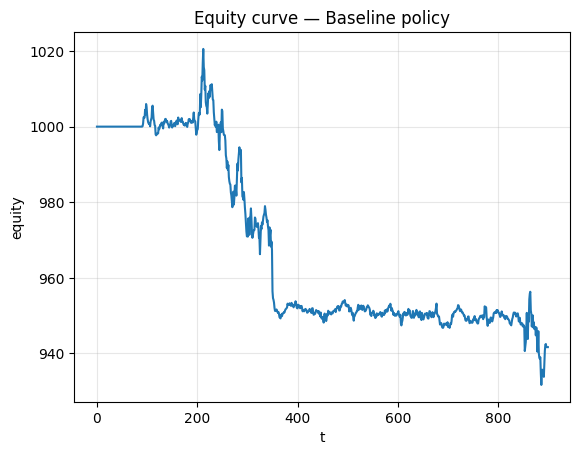

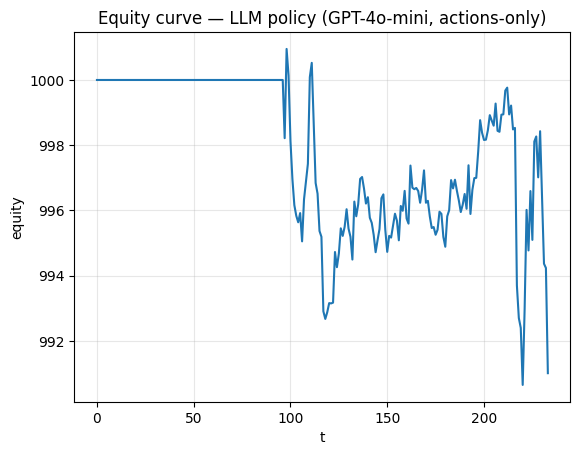

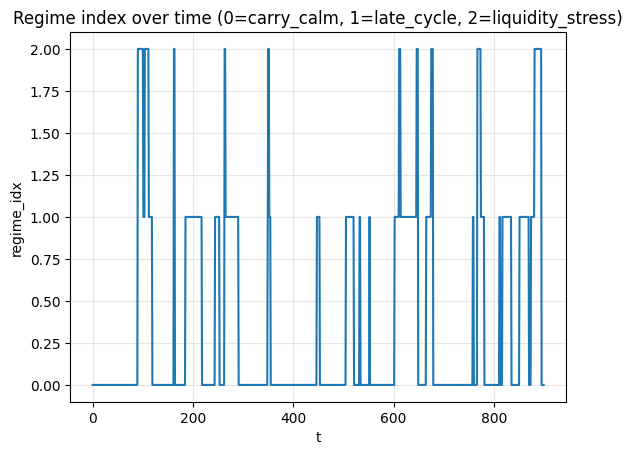

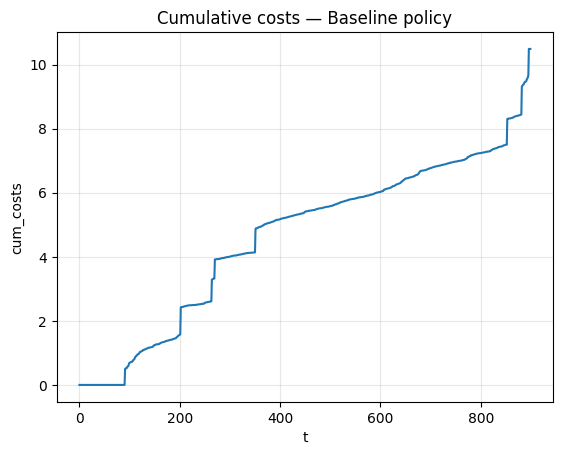

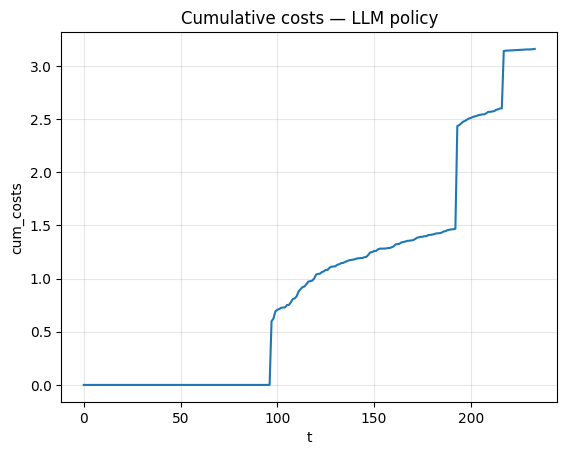

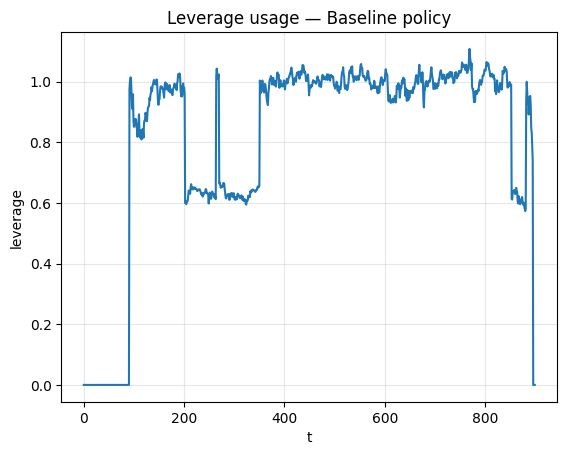

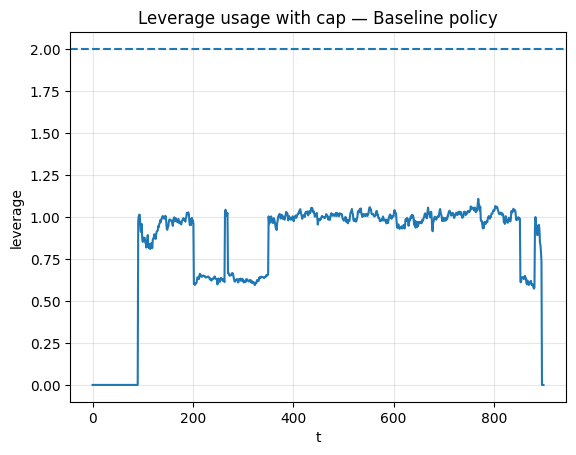

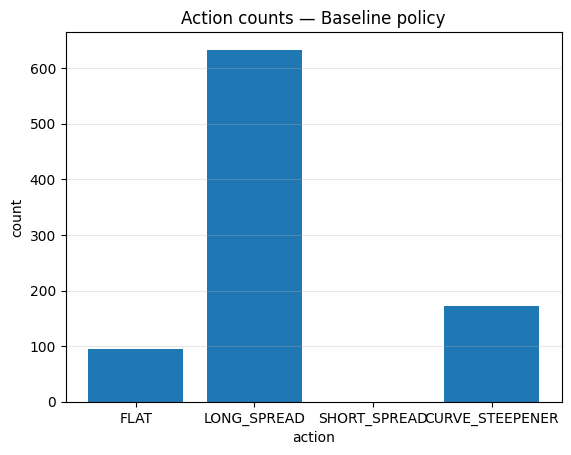

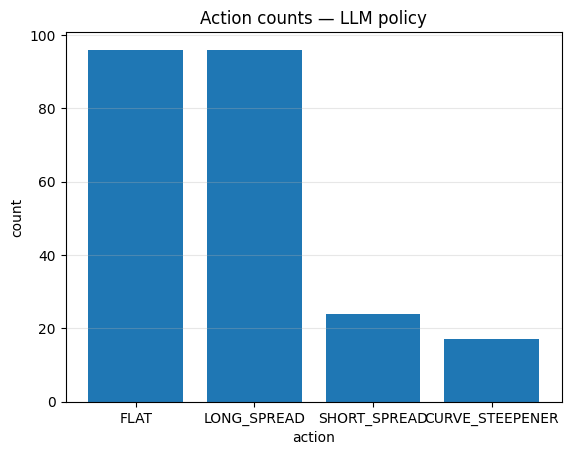

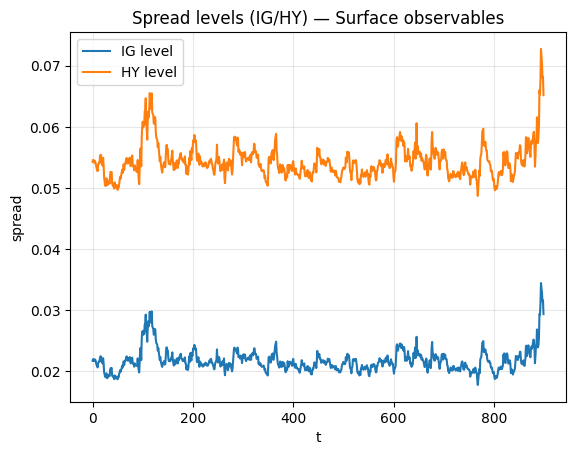

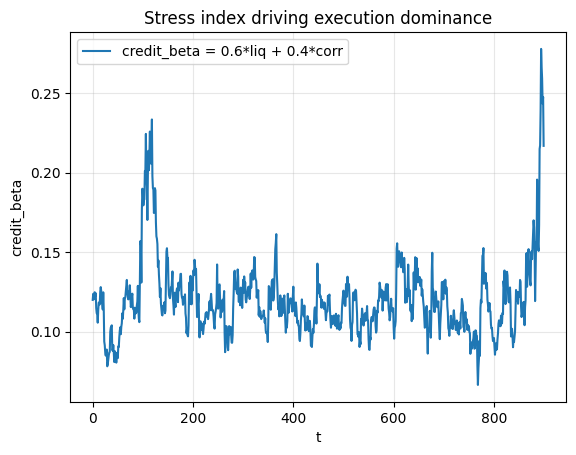


Interpretive table (mechanism → observation → fragility → execution):
             Mechanism Component                                                                   What It Pays In Calm                                                                      What Breaks It In Stress                                                             What You See In Diagnostics                                                               Execution/Constraint Note
        Spread carry / roll-down Small steady PnL from stable/tightening spreads; apparent 'income' dominates variance.      Sudden widening and gap risk overwhelm carry; short-spread positions face convex losses.                Equity drifts in calm, then jumps/draws down during stress regime bands. Churn is costly; the 'edge' can be smaller than costs unless position changes are rare.
Default intensity drift (hazard)                               Low hazard supports tight spreads; carry looks reliable.              Hazard rises in 

In [23]:
# CELL 10 — diagnostics + interpretive table (plots + action counts + costs + lesson table)
# FIX: Cell 9 can terminate early (time budget) so series lengths may differ.
# We therefore build per-result t_grids (len(equity)) for each run.

def plot_series(x, y, title, xlabel="t", ylabel="value"):
    x = np.asarray(x)
    y = np.asarray(y)
    n = min(len(x), len(y))
    if n <= 1:
        print(f"[WARN] Not enough points to plot: {title}")
        return
    plt.figure()
    plt.plot(x[:n], y[:n])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_action_counts(action_counts, title):
    plt.figure()
    keys = list(action_counts.keys())
    vals = [action_counts[k] for k in keys]
    plt.bar(keys, vals)
    plt.title(title)
    plt.xlabel("action")
    plt.ylabel("count")
    plt.grid(True, axis="y", alpha=0.3)
    plt.show()

def plot_regime(n_points):
    # Regime index plot aligned to n_points
    n = int(n_points)
    if n <= 1:
        print("[WARN] Not enough points to plot regimes.")
        return
    plt.figure()
    plt.plot(np.arange(n), r_idx[:n], linewidth=1.5)
    plt.title("Regime index over time (0=carry_calm, 1=late_cycle, 2=liquidity_stress)")
    plt.xlabel("t")
    plt.ylabel("regime_idx")
    plt.grid(True, alpha=0.3)
    plt.show()

# Build per-run t grids
t_base = np.arange(len(res_baseline["equity"]))
plot_series(t_base, res_baseline["equity"], "Equity curve — Baseline policy", ylabel="equity")

if res_llm is not None:
    t_llm = np.arange(len(res_llm["equity"]))
    plot_series(t_llm, res_llm["equity"], "Equity curve — LLM policy (GPT-4o-mini, actions-only)", ylabel="equity")

# Regime plot: use the longest available plotted length to show context
n_reg = len(res_baseline["equity"])
if res_llm is not None:
    n_reg = max(n_reg, len(res_llm["equity"]))
plot_regime(n_reg)

# Costs
plot_series(np.arange(len(res_baseline["costs_cum"])), res_baseline["costs_cum"], "Cumulative costs — Baseline policy", ylabel="cum_costs")
if res_llm is not None:
    plot_series(np.arange(len(res_llm["costs_cum"])), res_llm["costs_cum"], "Cumulative costs — LLM policy", ylabel="cum_costs")

# Leverage with cap
plot_series(np.arange(len(res_baseline["leverage"])), res_baseline["leverage"], "Leverage usage — Baseline policy", ylabel="leverage")
plt.figure()
plt.plot(np.arange(len(res_baseline["leverage"])), res_baseline["leverage"])
plt.axhline(rp["max_leverage"], linestyle="--")
plt.title("Leverage usage with cap — Baseline policy")
plt.xlabel("t")
plt.ylabel("leverage")
plt.grid(True, alpha=0.3)
plt.show()

# Action counts
plot_action_counts(res_baseline["action_counts"], "Action counts — Baseline policy")
if res_llm is not None:
    plot_action_counts(res_llm["action_counts"], "Action counts — LLM policy")

# Optional mechanism visibility (aligned to baseline length; truncate arrays to match)
n_vis = len(res_baseline["equity"])
t_vis = np.arange(n_vis)

plt.figure()
plt.plot(t_vis, level_ig[:n_vis], label="IG level")
plt.plot(t_vis, level_hy[:n_vis], label="HY level")
plt.title("Spread levels (IG/HY) — Surface observables")
plt.xlabel("t")
plt.ylabel("spread")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure()
plt.plot(t_vis, credit_beta[:n_vis], label="credit_beta = 0.6*liq + 0.4*corr")
plt.title("Stress index driving execution dominance")
plt.xlabel("t")
plt.ylabel("credit_beta")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Interpretive table
interp = pd.DataFrame([
    {
        "Mechanism Component": "Spread carry / roll-down",
        "What It Pays In Calm": "Small steady PnL from stable/tightening spreads; apparent 'income' dominates variance.",
        "What Breaks It In Stress": "Sudden widening and gap risk overwhelm carry; short-spread positions face convex losses.",
        "What You See In Diagnostics": "Equity drifts in calm, then jumps/draws down during stress regime bands.",
        "Execution/Constraint Note": "Churn is costly; the 'edge' can be smaller than costs unless position changes are rare."
    },
    {
        "Mechanism Component": "Default intensity drift (hazard)",
        "What It Pays In Calm": "Low hazard supports tight spreads; carry looks reliable.",
        "What Breaks It In Stress": "Hazard rises in late-cycle/stress; repricing is nonlinear across rating buckets.",
        "What You See In Diagnostics": "HY level moves more than IG; stress PnL asymmetry increases.",
        "Execution/Constraint Note": "Sizing must shrink with hazard/stress to avoid leverage amplification of tail risk."
    },
    {
        "Mechanism Component": "Liquidity withdrawal",
        "What It Pays In Calm": "Cheap execution; low impact encourages risk-taking and rebalancing.",
        "What Breaks It In Stress": "Impact rises; spreads widen with inventory constraints; execution dominates realized outcome.",
        "What You See In Diagnostics": "Cumulative costs accelerate in stress; leverage reduction often improves survival.",
        "Execution/Constraint Note": "Impact proxy scales with (liq+corr); attempting to 'trade through stress' is punished."
    },
    {
        "Mechanism Component": "Correlation stress / gap risk",
        "What It Pays In Calm": "Diversification across tenors/rating helps; slope trades appear stable.",
        "What Breaks It In Stress": "Correlations spike; curve reprices abruptly; hedges fail when needed most.",
        "What You See In Diagnostics": "Regime bands coincide with abrupt spread changes and stronger drawdowns.",
        "Execution/Constraint Note": "Curve trades are still spread trades; they inherit liquidity/correlation fragility."
    },
    {
        "Mechanism Component": "Transaction costs & impact",
        "What It Pays In Calm": "Costs are small enough that low-frequency rules can survive.",
        "What Breaks It In Stress": "Costs rise with urgency and illiquidity; 'optimal' signals are dominated by execution.",
        "What You See In Diagnostics": "Costs curve bends upward exactly during stress; action counts correlate with cost drag.",
        "Execution/Constraint Note": "Hysteresis reduces churn; execution-aware risk budget is a structural necessity."
    },
    {
        "Mechanism Component": "Leverage cap & drawdown stop",
        "What It Pays In Calm": "Keeps exposure coherent and comparable across policies; prevents silent blow-ups.",
        "What Breaks It In Stress": "Forced deleveraging can lock in losses; survival constraints override optimization.",
        "What You See In Diagnostics": "Leverage hits cap before drawdown stop; equity stabilization after forced flat.",
        "Execution/Constraint Note": "Constraints are part of the mechanism: they shape realized PnL as much as the surface."
    }
])

print("\nInterpretive table (mechanism → observation → fragility → execution):")
print(interp.to_string(index=False))

print("\nREQUIRED LESSON:")
print("CREDIT PRICES THE DOWNSIDE BEFORE EQUITIES ADMIT IT — AND LIQUIDITY DOMINATES REALIZED PnL IN STRESS.")

# Metrics tables
rows = []
rows.append({"policy": "baseline", **res_baseline["metrics"]})
if res_llm is not None:
    rows.append({"policy": "llm", **res_llm["metrics"]})
metrics_df = pd.DataFrame(rows)
print("\nSummary metrics:")
print(metrics_df.to_string(index=False))

# Telemetry quick view (baseline + llm if present)
def show_telemetry_brief(res, name):
    tel = res.get("telemetry", {})
    if not tel:
        print(f"\n[WARN] No telemetry in result: {name}")
        return
    brief = {
        "run_id": tel["run_manifest"]["run_id"],
        "policy_mode": tel["run_manifest"]["policy_mode"],
        "steps_ran": res["metrics"].get("steps_ran", None),
        "used_llm_count": tel["policy_telemetry"].get("used_llm_count", None),
        "fallback_count": tel["policy_telemetry"].get("fallback_count", None),
        "total_cost_sum": tel["execution_telemetry"].get("total_cost_sum", None),
        "impact_cost_sum": tel["execution_telemetry"].get("impact_cost_sum", None),
        "turnover_abs_sum": tel["execution_telemetry"].get("turnover_abs_sum", None),
        "max_dd_observed": tel["risk_telemetry"].get("max_dd_observed", None),
        "forced_flat_triggered": tel["risk_telemetry"].get("forced_flat_triggered", None),
    }
    print(f"\nTelemetry brief — {name}:")
    print(json.dumps(brief, indent=2))

show_telemetry_brief(res_baseline, "baseline")
if res_llm is not None:
    show_telemetry_brief(res_llm, "llm")

# Audit tail (compact)
if len(step_log) > 0:
    tail = pd.DataFrame(step_log[-5:])
    cols = [c for c in ["t","regime","action","used_llm","llm_err","trade_abs","cost","impact","pnl_net","equity","leverage","dd","jump"] if c in tail.columns]
    print("\nAudit tail (last 5 steps):")
    print(tail[cols].to_string(index=False))


##11.CONCLUSION

**Conclusion**

This notebook is best understood as an instrumented experiment in credit market structure rather than a strategy template. The central outcome is not a return statistic; it is a set of diagnostics that make visible the causal chain from regime dynamics to spread surfaces to execution-constrained realized PnL. Credit spreads are an archetypal “mechanism-first” object precisely because they compress multiple economic forces into a tradable surface: expected loss and uncertainty, liquidity premia, correlation stress, and financing constraints. The notebook’s value is that each of these forces is represented explicitly and then forced to interact inside a closed-loop environment.

**What was learned about credit as a mechanism**

The first structural insight is the asymmetry between how compensation is earned and how it is withdrawn. In calm conditions, the system generates a surface where spreads are stable or slowly tightening, and the temptation is to interpret this as an opportunity to harvest carry via short-spread exposure. But the environment demonstrates why that framing is incomplete: carry is not “free income,” it is compensation for exposure to discontinuous repricing. When regimes shift, the same state variables that widen spreads also increase liquidity stress and correlation stress. That coupling ensures that drawdowns occur when trading is expensive and constraints bind, which is exactly the point. Credit premia are paid because, in stress, the marginal provider of balance sheet is scarce.

The second insight is that the spread curve is not merely a summary statistic. Its shape encodes term-dependent contributions from hazard, liquidity, and correlation stress. The notebook’s explicit level and slope features show that significant PnL can emerge from curve dynamics even if the “direction” of spreads is broadly correct. This is a professional lesson: in credit, curve and basis effects often dominate naïve directional views, and a regime shift may express itself as a non-parallel repricing rather than a uniform widening. Thinking in surfaces—rather than single spreads—forces attention to which part of the market is repricing and why.

A third insight concerns rating segmentation. The environment’s IG and HY surfaces respond differently to the same state drivers. HY is structurally a higher beta object: its hazard sensitivity is larger and its jump component more severe. That makes HY an efficient carrier of stress information, but it also makes HY a focal point for fragility. The diagnostics should show that HY-level features can move disproportionately, and that actions that look symmetric in IG and HY exposures may not be symmetric in realized tail behavior. This is a compact demonstration of why risk budgeting across rating buckets cannot be reduced to a single spread unit.

**Fragility modes: how and why the mechanism breaks**

A mechanism-first notebook must not only show what earns compensation; it must show what destroys it. In this environment, three fragility modes recur.

First is **regime discontinuity**. Even if regimes are modeled with persistence, the act of entering a stress regime changes the effective economics of the surface: jump-like components appear, and slope/level relationships can shift. This creates the standard credit problem: a position that is sensible under one local regime becomes structurally wrong under another, not because parameters drift slowly but because constraints and market structure change. The regime plot is not decoration; it is a map of local economic laws.

Second is **liquidity-driven execution dominance**. The impact proxy rises with liquidity and correlation stress, ensuring that the cost of changing exposure is state-dependent. That is the correct structural feature: trading is cheap when you least need it and expensive when you most need it. This produces the educational outcome that many practitioners only internalize after experiencing it: even correct mechanism recognition can be monetarily irrelevant if the adjustment cost is too high. The cumulative cost plot should show acceleration precisely during stress regimes, highlighting that execution is not a constant friction but an endogenous constraint.

Third is **constraint binding and forced behavior**. The leverage cap and drawdown stop are not optional add-ons; they are representations of financing reality. When spreads widen and volatility rises, leverage usage can become dangerous even if nominal exposures are unchanged, and drawdown constraints can force de-risking. The notebook’s forced-flat behavior demonstrates a survival constraint: once breached, optimization is replaced by preservation. This is a correct abstraction of real professional environments where risk limits, margin, and governance overrule the trader’s preferences.

**Carry, regimes, and surfaces: what the diagnostics mean**

Read the equity curve and action counts together. A policy that switches frequently may look responsive, but the turnover and cost telemetry will reveal whether responsiveness is paid for in impact. Conversely, a policy that holds positions through stress may show lower cost but larger drawdowns. Neither outcome is “right” in the abstract; the point is to see how a mechanism plus an execution layer produces a particular trade-off.

Read the cost accumulation plot as a structural signal. When costs accelerate, it indicates that the environment has entered conditions where liquidity is scarce and correlation stress is high. Under such conditions, the correct professional question is whether the portfolio should preserve optionality rather than chase marginal surface interpretations. This is why “FLAT” is a meaningful action, not a failure. A mechanism-first lab should teach that being inactive is an economically coherent response when the market is charging for immediacy.

Read the regime plot as an explanation, not a label. “Liquidity stress” in this notebook is not just a word; it corresponds to higher hazard drift, higher liquidity stress, higher correlation stress, and possible jumps. That combination is a stylized representation of how credit crises behave: fundamentals, liquidity, and hedging demand move together. The interpretive table in Cell 10 is meant to translate these internal mechanics into an external professional narrative: what pays, what breaks, what you see, and how execution turns that into realized outcomes.

**How to iterate experimentally**

A laboratory is valuable only if it invites controlled variation. Several classes of experiments are particularly instructive:

One, adjust the **regime transition matrix** to change persistence and frequency of stress. This isolates how much of the agent’s experience is driven by the prevalence of stress versus the severity of stress. Professionals often underestimate how sensitive carry strategies are to the clustering of stress events, not just their magnitude.

Two, modify the **coupling between stress and impact**. The notebook currently ties impact to liquidity and correlation stress, which is structurally correct. Increasing this coupling will demonstrate the threshold at which execution dominates any plausible surface edge. Decreasing it will show how quickly a toy market can become unrealistically forgiving. This is a direct lesson in model risk: execution assumptions are often the hidden determinant of results.

Three, separate the roles of **hazard versus liquidity**. For example, create scenarios where hazard rises but liquidity remains benign, versus liquidity shocks without large hazard drift. This can teach the difference between fundamental deterioration and technical dislocation. The surface may widen in both cases, but the execution environment and the appropriate response differ.

Four, explore action space design. If “CURVE_STEEPENER” is too coarse, you can introduce distinct curve actions (front-end versus long-end tilt) while keeping the action set finite. The lesson here is that richer expression can reduce basis risk, but it can also increase turnover and execution drag. In professional practice, adding degrees of freedom rarely improves outcomes if it increases trading frequency under stress.

**Why execution dominates theory, again**

The notebook repeatedly returns to the same professional truth: economic mechanisms live inside institutions, and institutions trade through constraints. Credit spreads are compensation for bearing risk when constraints bind. Therefore, any credible educational model must include the constraint layer as part of the mechanism, not as a postscript. When you observe drawdowns coincident with rising costs and binding leverage, you are seeing the essential structure of credit markets. The difference between a conceptual understanding and a professional understanding is exactly this: professionals price not only the surface, but the cost of expressing views on the surface under stress.

**Final professional intuition**

If you take one durable intuition from this laboratory, it should be this: credit is where markets reconcile fundamentals with financing. Spreads often move first because spreads are the immediate channel through which liquidity, hedging demand, and balance sheet scarcity are priced. That is why credit can appear prescient relative to equities, and why carry strategies that ignore regimes and execution are structurally fragile. The notebook does not tell you what will happen. It tells you what must be true in order for certain behaviors to arise. That is the mechanism-first promise: surfaces exist because mechanisms exist; mechanisms pay in calm and charge in stress; and execution converts theoretical exposure into realized fragility.

This is not strategy promotion. It is a controlled environment for building structural intuition that transfers to real markets precisely because it refuses to pretend that prediction is the primary skill. In credit, the primary skill is understanding how compensation, constraints, and surface dynamics interact when the market stops being accommodating.
